## Sommaire <a name=0 ></a>
- [Introduction](#1)
- [I. Nettoyage & filtrage des features & produits](#2)
    - [1. Importation & Découverte des Données](#3)
    - [2. Etude Préalable des Données Manquantes](#4)
    - [3. Traitement de la variable cible](#5)
    - [4. Sélection & Traitement des Features](#6)
- [II. Identification & traitement des Valeurs Aberrantes](#7)
- [III. Identification & traitement des Valeurs Manquantes](#8)
- [IV. Analyses Uni & Bi-Variées](#9)
    - [1. Analyses Uni-Variées](#10)
    - [2. Analyses Bi-Variées](#11)
- [V. Analyse Multi-Variée](#12)
    - [1. Analyse des Composantes Principales (ACP)](#13)
    - [2. Analyse de la Variance(ANOVA)](#14)
        - [2.1 Test d'Homoscédasticité](#15)
        - [2.2 Test de Normalité des Résidus](#16)
- [Conclusion](#17)

# Introduction<a name=1 ></a>

Le rapport qui suit a été élaboré dans le cadre du projet d'amélioration de la base de données Open Food Facts appartenant à l'agence Santé Publique France. Cette base de données open source est mise à la disposition de particuliers et d'organisations afin de leur permettre de connaître la qualité nutritionnelle d'un panel considérablement volumineux et varié de produits alimentaires.

Au démarrage de notre étude, l'ajout d'un produit à la base de données d'Open Food Facts nécessite de remplir de nombreux champs textuels et numériques, ce qui peut conduire à des erreurs de saisie et à des valeurs manquantes dans la base. Il a ainsi été demandé de la part de l'agence Santé Publique France de créer un système de suggestion ou d'auto-complétion pour aider les usagers à remplir plus efficacement la base de données.

Nous allons donc ici nous concentrer sur la prise en main des données. Une exploration et un nettoyage sera en effet requis pour l'élaboration du projet. L'objectif de ce dernier est de déterminer la faisabilité de cette idée d’application de Santé publique France. Pour se faire, nous procéderons 5 étapes principales permettant de nettoyer et explorer les données :

- Dans un premier temps, nous allons traiter le jeu de données. Pour cela, nous allons tout d'abord en repérant des variables pertinentes pour les traitements à venir, et nécessaires pour suggérer des valeurs manquantes
- Ensuite, pour chacune de ces variables pertinentes sélectionnées, nous procéderons à un nettoyage des données en identifiant et en traitant les éventuelles valeurs aberrantes de chaque variable.
- Dans un troisième temps, nous mettront en évidence les éventuelles valeurs manquantes de ces variables. Ici, 4 méthodes de traitement adaptées aux variables concernées seront utilisées. L'ensemble de ces traitement sera, bien évidemment, automatisé afin d'éviter de répéter ces opérations
- Tout au long de notre analyse, nous produirons des visualisations afin de mieux comprendre les données. Une analyse univariée pour chaque variable intéressante sera donc faite, afin de synthétiser son comportement.
- Nous irons enfin sélectionner des variables à l'aide d'une analyse multivariée, et effectuer les tests statistiques appropriés pour vérifier la significativité des résultats.


# I. Nettoyage & Filtrage des features & des produits <a name=2 ></a>

Le jeu de données Open Food Facts est disponible sur le site officiel, et les champs sont séparés en 4 sections :
- Les informations générales sur la fiche du produit : nom, date de modification, etc.
- Un ensemble de tags : catégorie du produit, localisation, origine, etc.
- Les ingrédients composant les produits et leurs additifs éventuels.
- Des informations nutritionnelles : quantité en grammes d’un nutriment pour 100 grammes du produit.

Afin de simplifier notre approche, nous allons commencer par établir la faisabilité de suggérer les valeurs manquantes pour une variable dont plus de 50% des valeurs sont manquantes

## 1. Importation & Découverte des Données<a name=3 ></a>

Commençons déjà par importater le jeu de données Open Food Facts via la librairie Pandas : 

In [1]:
import pandas as pd

pd.options.display.max_columns = 200

OpenFoodFact = pd.read_csv('fr.openfoodfacts.org.products.csv',sep='\t',dtype={'code': str})
OpenFoodFact.info()

C:\Users\Alex-\AppData\Local\Temp\ipykernel_14360\1027983634.py:5: DtypeWarning: Columns (3,5,19,20,24,25,26,27,28,35,36,37,38,39,48) have mixed types. Specify dtype option on import or set low_memory=False.
  OpenFoodFact = pd.read_csv('fr.openfoodfacts.org.products.csv',sep='\t',dtype={'code': str})


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Columns: 162 entries, code to water-hardness_100g
dtypes: float64(106), object(56)
memory usage: 396.5+ MB


In [2]:
OpenFoodFact

code                                                url  \
0       0000000003087  http://world-fr.openfoodfacts.org/produit/0000...   
1       0000000004530  http://world-fr.openfoodfacts.org/produit/0000...   
2       0000000004559  http://world-fr.openfoodfacts.org/produit/0000...   
3       0000000016087  http://world-fr.openfoodfacts.org/produit/0000...   
4       0000000016094  http://world-fr.openfoodfacts.org/produit/0000...   
...               ...                                                ...   
320767  9948282780603  http://world-fr.openfoodfacts.org/produit/9948...   
320768       99567453  http://world-fr.openfoodfacts.org/produit/9956...   
320769  9970229501521  http://world-fr.openfoodfacts.org/produit/9970...   
320770  9980282863788  http://world-fr.openfoodfacts.org/produit/9980...   
320771   999990026839  http://world-fr.openfoodfacts.org/produit/9999...   

                           creator   created_t      created_datetime  \
0       openfoodfacts-contributors  1474103866  2016-09-17T09:17:46Z   
1                  usda-ndb-import  1489069957  2017-03-09T14:32:37Z   
2                  usda-ndb-import  1489069957  2017-03-09T14:32:37Z   
3                  usda-ndb-import  1489055731  2017-03-09T10:35:31Z   
4                  usda-ndb-import  1489055653  2017-03-09T10:34:13Z   
...                            ...         ...                   ...   
320767  openfoodfacts-contributors  1490631299  2017-03-27T16:14:59Z   
320768             usda-ndb-import  1489059076  2017-03-09T11:31:16Z   
320769                      tomato  1422099377  2015-01-24T11:36:17Z   
320770  openfoodfacts-contributors  1492340089  2017-04-16T10:54:49Z   
320771             usda-ndb-import  1489072709  2017-03-09T15:18:29Z   

       last_modified_t last_modified_datetime  \
0           1474103893   2016-09-17T09:18:13Z   
1           1489069957   2017-03-09T14:32:37Z   
2           1489069957   2017-03-09T14:32:37Z   
3           1489055731   2017-03-09T10:35:31Z   
4           1489055653   2017-03-09T10:34:13Z   
...                ...                    ...   
320767      1491244498   2017-04-03T18:34:58Z   
320768      1491244499   2017-04-03T18:34:59Z   
320769      1491244499   2017-04-03T18:34:59Z   
320770      1492340089   2017-04-16T10:54:49Z   
320771      1491244499   2017-04-03T18:34:59Z   

                                             product_name  \
0                                      Farine de blé noir   
1                          Banana Chips Sweetened (Whole)   
2                                                 Peanuts   
3                                  Organic Salted Nut Mix   
4                                         Organic Polenta   
...                                                   ...   
320767                                  Tomato & ricotta    
320768  Mint Melange Tea A Blend Of Peppermint, Lemon ...   
320769                                            乐吧泡菜味薯片   
320770                           Tomates aux Vermicelles    
320771                    Sugar Free Drink Mix, Peach Tea   

                           generic_name quantity  packaging packaging_tags  \
0                                   NaN      1kg        NaN            NaN   
1                                   NaN      NaN        NaN            NaN   
2                                   NaN      NaN        NaN            NaN   
3                                   NaN      NaN        NaN            NaN   
4                                   NaN      NaN        NaN            NaN   
...                                 ...      ...        ...            ...   
320767                              NaN        1  Plastique      plastique   
320768                              NaN      NaN  Plastique      plastique   
320769  Leba pickle flavor potato chips     50 g  Plastique      plastique   
320770                              NaN      67g        NaN            NaN   
320771                              NaN      NaN  Plastique

Avec pas moins de 320772 produits et 162 features, nous avons affaire à un dataset particulièrement volumineux et riche en informations, du moins en théorie. La première tâche absolument indispensable à exécuter, et ce quel que soit le contexte, est de détecter et traiter la clé primaire, c'est à dire la variable contenant des valeurs uniques pour chacun des individus étudiés. La finalité de cette tâche est de s'assurer que chaque individus dispose bien d'un identifiant qui lui est spécifique et non partagé.

Pour des raisons évidentes, cette clé primaire doit se présenter au format string. Le code qui suit nous permet dès lors de lister l'ensemble des features de ce format en fonction du nombre de valeurs uniques qui le compose : 

In [3]:
OpenFoodFact.loc[:, OpenFoodFact.dtypes == object].nunique().sort_values(ascending=False)

code                                          320749
url                                           320749
product_name                                  221347
ingredients_text                              205520
additives                                     196069
created_t                                     189636
created_datetime                              189568
last_modified_t                               180639
last_modified_datetime                        180495
image_url                                      75836
image_small_url                                75836
brands                                         58784
brands_tags                                    50253
additives_tags                                 41537
additives_fr                                   41537
generic_name                                   38584
categories                                     36982
serving_size                                   25423
categories_fr                                 

Ce sont donc les variables "code" et "url" qui pourront nous servir d'identifiant. Pour autant, le nombre de valeurs unique, qui est identique entre elles, demeure inférieure au nombre total de lignes du dataset (320749 < 320772). Un traitement de ces variables est donc bel est bien nécessaire.

Il semble, à première vue, que les variables "code" et "url" sont complémentaires. Nous allons confirmer cela en vérifiant le nombre de lignes contenant une valeur dans l'une et non dans l'autre. Si ce n'est pas le cas, nous pourrons par la suite  vérifier la présence ou non de doublons : 

In [4]:
print ("Il y a",OpenFoodFact[(OpenFoodFact['url'].notnull())&(OpenFoodFact['code'].isna())].shape[0],'url sans code')
print ("Il y a",OpenFoodFact[(OpenFoodFact['url'].isna())&(OpenFoodFact['code'].notnull())].shape[0],'codes sans url')

OpenFoodFact.loc[OpenFoodFact['code'].duplicated(keep=False),:]

Il y a 0 url sans code
Il y a 0 codes sans url


code  url                                            creator  \
189068  NaN  NaN                  villecomtal-sur-arros-gers-france   
189103  NaN  NaN  villecomtal-sur-arros-gers-france,saint-just-c...   
189109  NaN  NaN                  villecomtal-sur-arros-gers-france   
189119  NaN  NaN                  villecomtal-sur-arros-gers-france   
189152  NaN  NaN                  villecomtal-sur-arros-gers-france   
189160  NaN  NaN                  villecomtal-sur-arros-gers-france   
189162  NaN  NaN                  villecomtal-sur-arros-gers-france   
189168  NaN  NaN                  villecomtal-sur-arros-gers-france   
189242  NaN  NaN                  villecomtal-sur-arros-gers-france   
189244  NaN  NaN                  villecomtal-sur-arros-gers-france   
189248  NaN  NaN                  villecomtal-sur-arros-gers-france   
189250  NaN  NaN                  villecomtal-sur-arros-gers-france   
189260  NaN  NaN                  villecomtal-sur-arros-gers-france   
189262  NaN  NaN                  villecomtal-sur-arros-gers-france   
189269  NaN  NaN                  villecomtal-sur-arros-gers-france   
189272  NaN  NaN                  villecomtal-sur-arros-gers-france   
189345  NaN  NaN  villecomtal-sur-arros-gers-france,saint-just-c...   
189362  NaN  NaN                  villecomtal-sur-arros-gers-france   
189364  NaN  NaN                  villecomtal-sur-arros-gers-france   
189379  NaN  NaN                  villecomtal-sur-arros-gers-france   
189404  NaN  NaN                  villecomtal-sur-arros-gers-france   
189406  NaN  NaN                  villecomtal-sur-arros-gers-france   
189417  NaN  NaN                  villecomtal-sur-arros-gers-france   

                                    created_t           created_datetime  \
189068                                 France                        NaN   
189103       Villecresnes,Villeurbanne,France                Dia,Sogeres   
189109                                 France                        NaN   
189119                          Veynes,France                     SuperU   
189152                        Torcy 77,France                  Carrefour   
189160                                 France                        NaN   
189162                    Saint-Priest,France                     Auchan   
189168                                    NaN                        NaN   
189242            Villers Bocage 80260,France           Carrefour market   
189244            Villers Bocage 80260,France           Carrefour market   
189248                                    NaN                        NaN   
189250                          Veynes,France             SuperU,Leclerc   
189260                            Montgermont                       Spar   
189262            Villers Bocage 80260,France         Banque alimentaire   
189269                                 France                    Leclerc   
189272                    Marseille 5°,France             Auchan,Super U   
189345                France,Nantes,Carquefou  Super U,Leclerc,Carrefour   
189362                                 France                        NaN   
189364                      Courrières,France                       Cora   
189379                                    NaN                        NaN   
189404  Brétigny-sur-Orge,Marseille 5°,France             Auchan,Super U   
189406                    Marseille 5°,France                    Super U   
189417                                 France                        NaN   

                        last_modified_t               last_modified_datetime  \
189068                  Belgique,France                 en:belgium,en:france   
189103                           France                            en:france   
189109  Belgique,France, en:switzerland  en:belgium,en:france,en:switzerland   
189119                           France                            en:france   
189152                           France                            en:france 

Ces 2 variable sont donc bel et bien complémentaires. De plus, l'infériorité du nombre de valeurs uniques qu'elles présentent par rapport au nombre total de lignes s'explique par le simple fait que les valeurs n'ont pas été rentrées pour 23 produits, que nous pouvons retirer du jeu de données.

Enfin, une dernière étape est nécessaire pour s'assurer à 100% de la complémentarité de ces 2 variables : après visionnage du tableau, il est fort probable que les valeurs de "code" soient contenues à l'intérieur de celles de "url". Le code suivant va permettre de vérifier cela : 

In [5]:
OpenFoodFact.drop(OpenFoodFact.loc[OpenFoodFact['code'].duplicated(keep=False),:].index,inplace=True)
OpenFoodFact['code url'] = OpenFoodFact['url']
OpenFoodFact['code url'] = OpenFoodFact['code url'].replace('http://world-fr.openfoodfacts.org/produit/','',regex=True)

nouveau = []

for i in OpenFoodFact['code url'].values : 
    nouveau.append(i.split('/', 1)[0])
OpenFoodFact['code url'] = nouveau

OpenFoodFact[OpenFoodFact['code']!=OpenFoodFact['code url']]

Empty DataFrame
Columns: [code, url, creator, created_t, created_datetime, last_modified_t, last_modified_datetime, product_name, generic_name, quantity, packaging, packaging_tags, brands, brands_tags, categories, categories_tags, categories_fr, origins, origins_tags, manufacturing_places, manufacturing_places_tags, labels, labels_tags, labels_fr, emb_codes, emb_codes_tags, first_packaging_code_geo, cities, cities_tags, purchase_places, stores, countries, countries_tags, countries_fr, ingredients_text, allergens, allergens_fr, traces, traces_tags, traces_fr, serving_size, no_nutriments, additives_n, additives, additives_tags, additives_fr, ingredients_from_palm_oil_n, ingredients_from_palm_oil, ingredients_from_palm_oil_tags, ingredients_that_may_be_from_palm_oil_n, ingredients_that_may_be_from_palm_oil, ingredients_that_may_be_from_palm_oil_tags, nutrition_grade_uk, nutrition_grade_fr, pnns_groups_1, pnns_groups_2, states, states_tags, states_fr, main_category, main_category_fr, image_url, image_small_url, energy_100g, energy-from-fat_100g, fat_100g, saturated-fat_100g, butyric-acid_100g, caproic-acid_100g, caprylic-acid_100g, capric-acid_100g, lauric-acid_100g, myristic-acid_100g, palmitic-acid_100g, stearic-acid_100g, arachidic-acid_100g, behenic-acid_100g, lignoceric-acid_100g, cerotic-acid_100g, montanic-acid_100g, melissic-acid_100g, monounsaturated-fat_100g, polyunsaturated-fat_100g, omega-3-fat_100g, alpha-linolenic-acid_100g, eicosapentaenoic-acid_100g, docosahexaenoic-acid_100g, omega-6-fat_100g, linoleic-acid_100g, arachidonic-acid_100g, gamma-linolenic-acid_100g, dihomo-gamma-linolenic-acid_100g, omega-9-fat_100g, oleic-acid_100g, elaidic-acid_100g, gondoic-acid_100g, mead-acid_100g, erucic-acid_100g, nervonic-acid_100g, trans-fat_100g, ...]
Index: []

Les codes présents dans la variables "url" et ceux présents dans la variable "code" sont compatibles à 100%. Il n'est donc pas nécessaire de conserver "url".

Maintenant que nous disposons d'un jeu de données avec une clé primaire solide, nous allons nous étudier son taux de remplissage. Cela signifie que l'on va s'intéresser aux valeurs manquantes, en calculant notamment son pourcentage sur l'ensemble du dataset. Nous allons également observer ces valeurs manquantes grâce à des graphiques prodiguées par la librairie missingno, que nous allons devoir cependant installer.

In [6]:
OpenFoodFact.drop(columns=['url','code url'], inplace=True)

def totalinfo(df):
    percentage = round(df.isna().sum().sum()/(df.shape[0]*df.shape[1]),2)*100
    print(f"La dataframe est vide à {percentage} %")

percentage = OpenFoodFact.isna().sum()/(OpenFoodFact.shape[0]-1)
OpenFoodFact.drop(columns=OpenFoodFact.loc[:,percentage.values==1], inplace=True)

!pip install missingno

import missingno as msno

## 2. Etude préalable des Données Manquantes<a name=4 ></a>

D'après nos calculs, 76% des valeurs du dataset n'ont pas été entrées. Sachant que ce dernier est assez volumineux, ce chiffre est significatif, et explique la nécessité d'effectuer une sélection restreinte de variables pour la suite de notre étude. Cette sélection se déterminera d'après le taux de remplissage de chacun de nos 162 features.

Dans cette démarche, les graphiques qui vont suivre ont été importée de la librairie missingno précédemment installée. Elles permettent une visualisation considérablement plus nette des valeurs manquantes présentes dans le dataset que de simple tableaux et calculs. De plus, nous allons pouvoir repérer une variable remplie à moins de 50% comme recommandée plus tôt et que nous allons pouvoir potentiellement traiter : 

La dataframe est vide à 76.0 %


<Axes: >

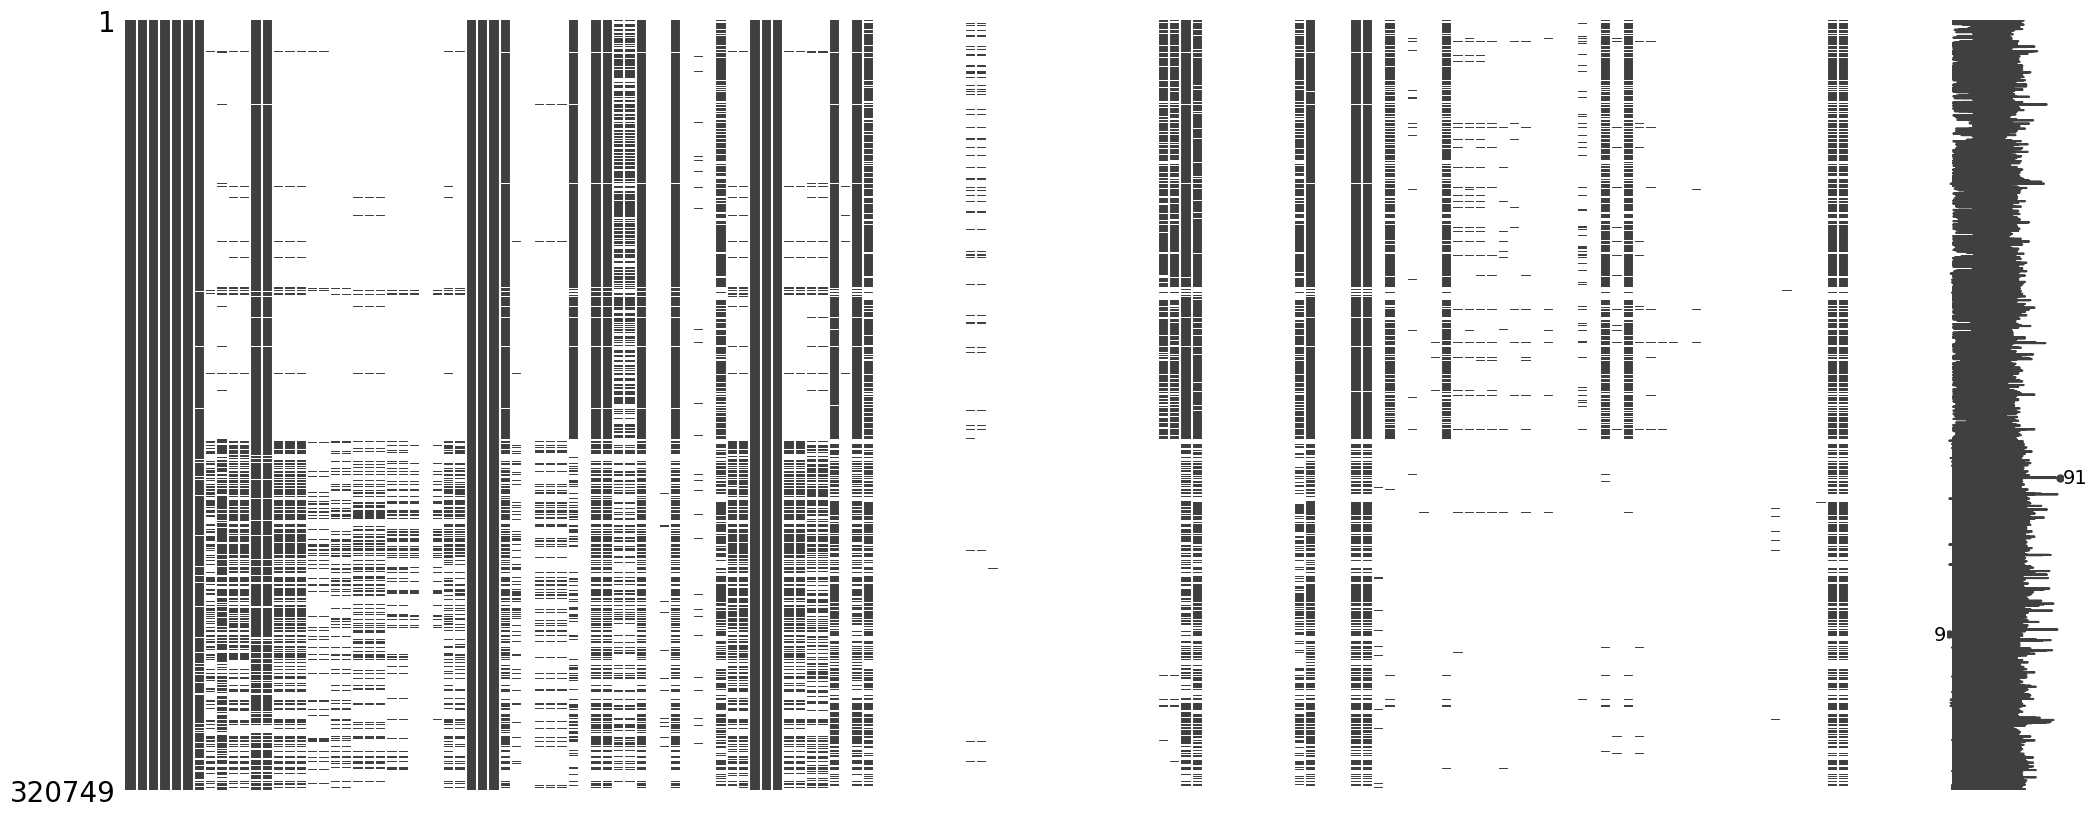

In [7]:
totalinfo(OpenFoodFact)
msno.matrix(OpenFoodFact)

<Axes: >

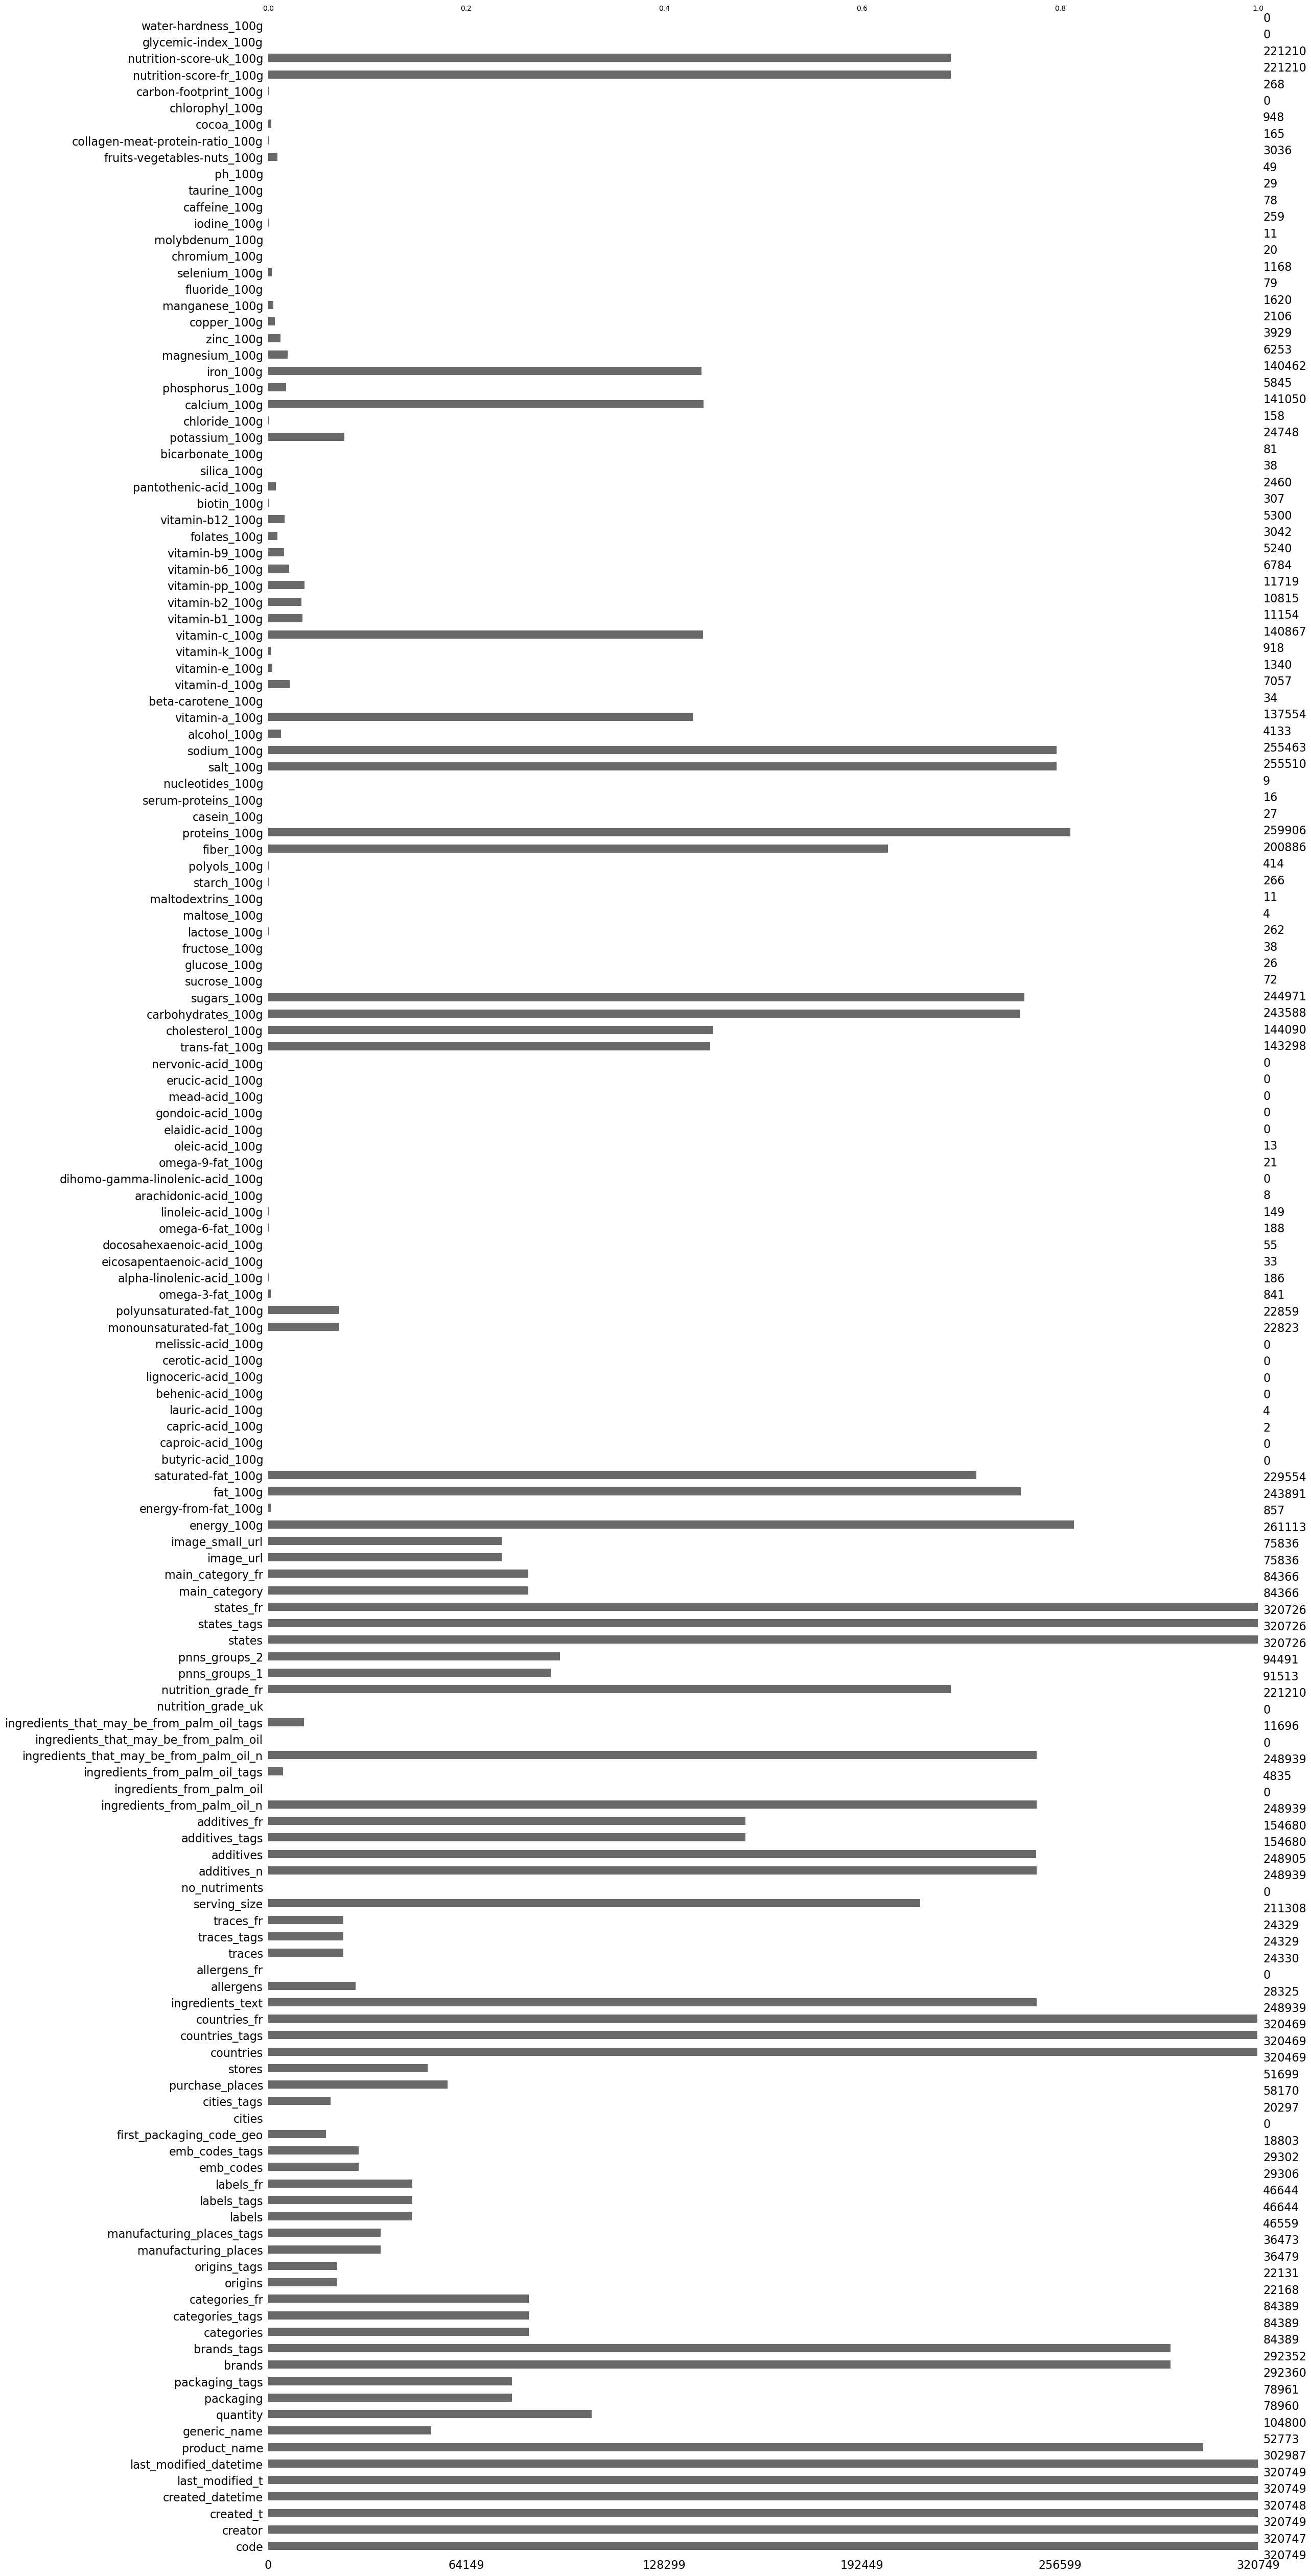

In [8]:
msno.bar(OpenFoodFact)

<Axes: >

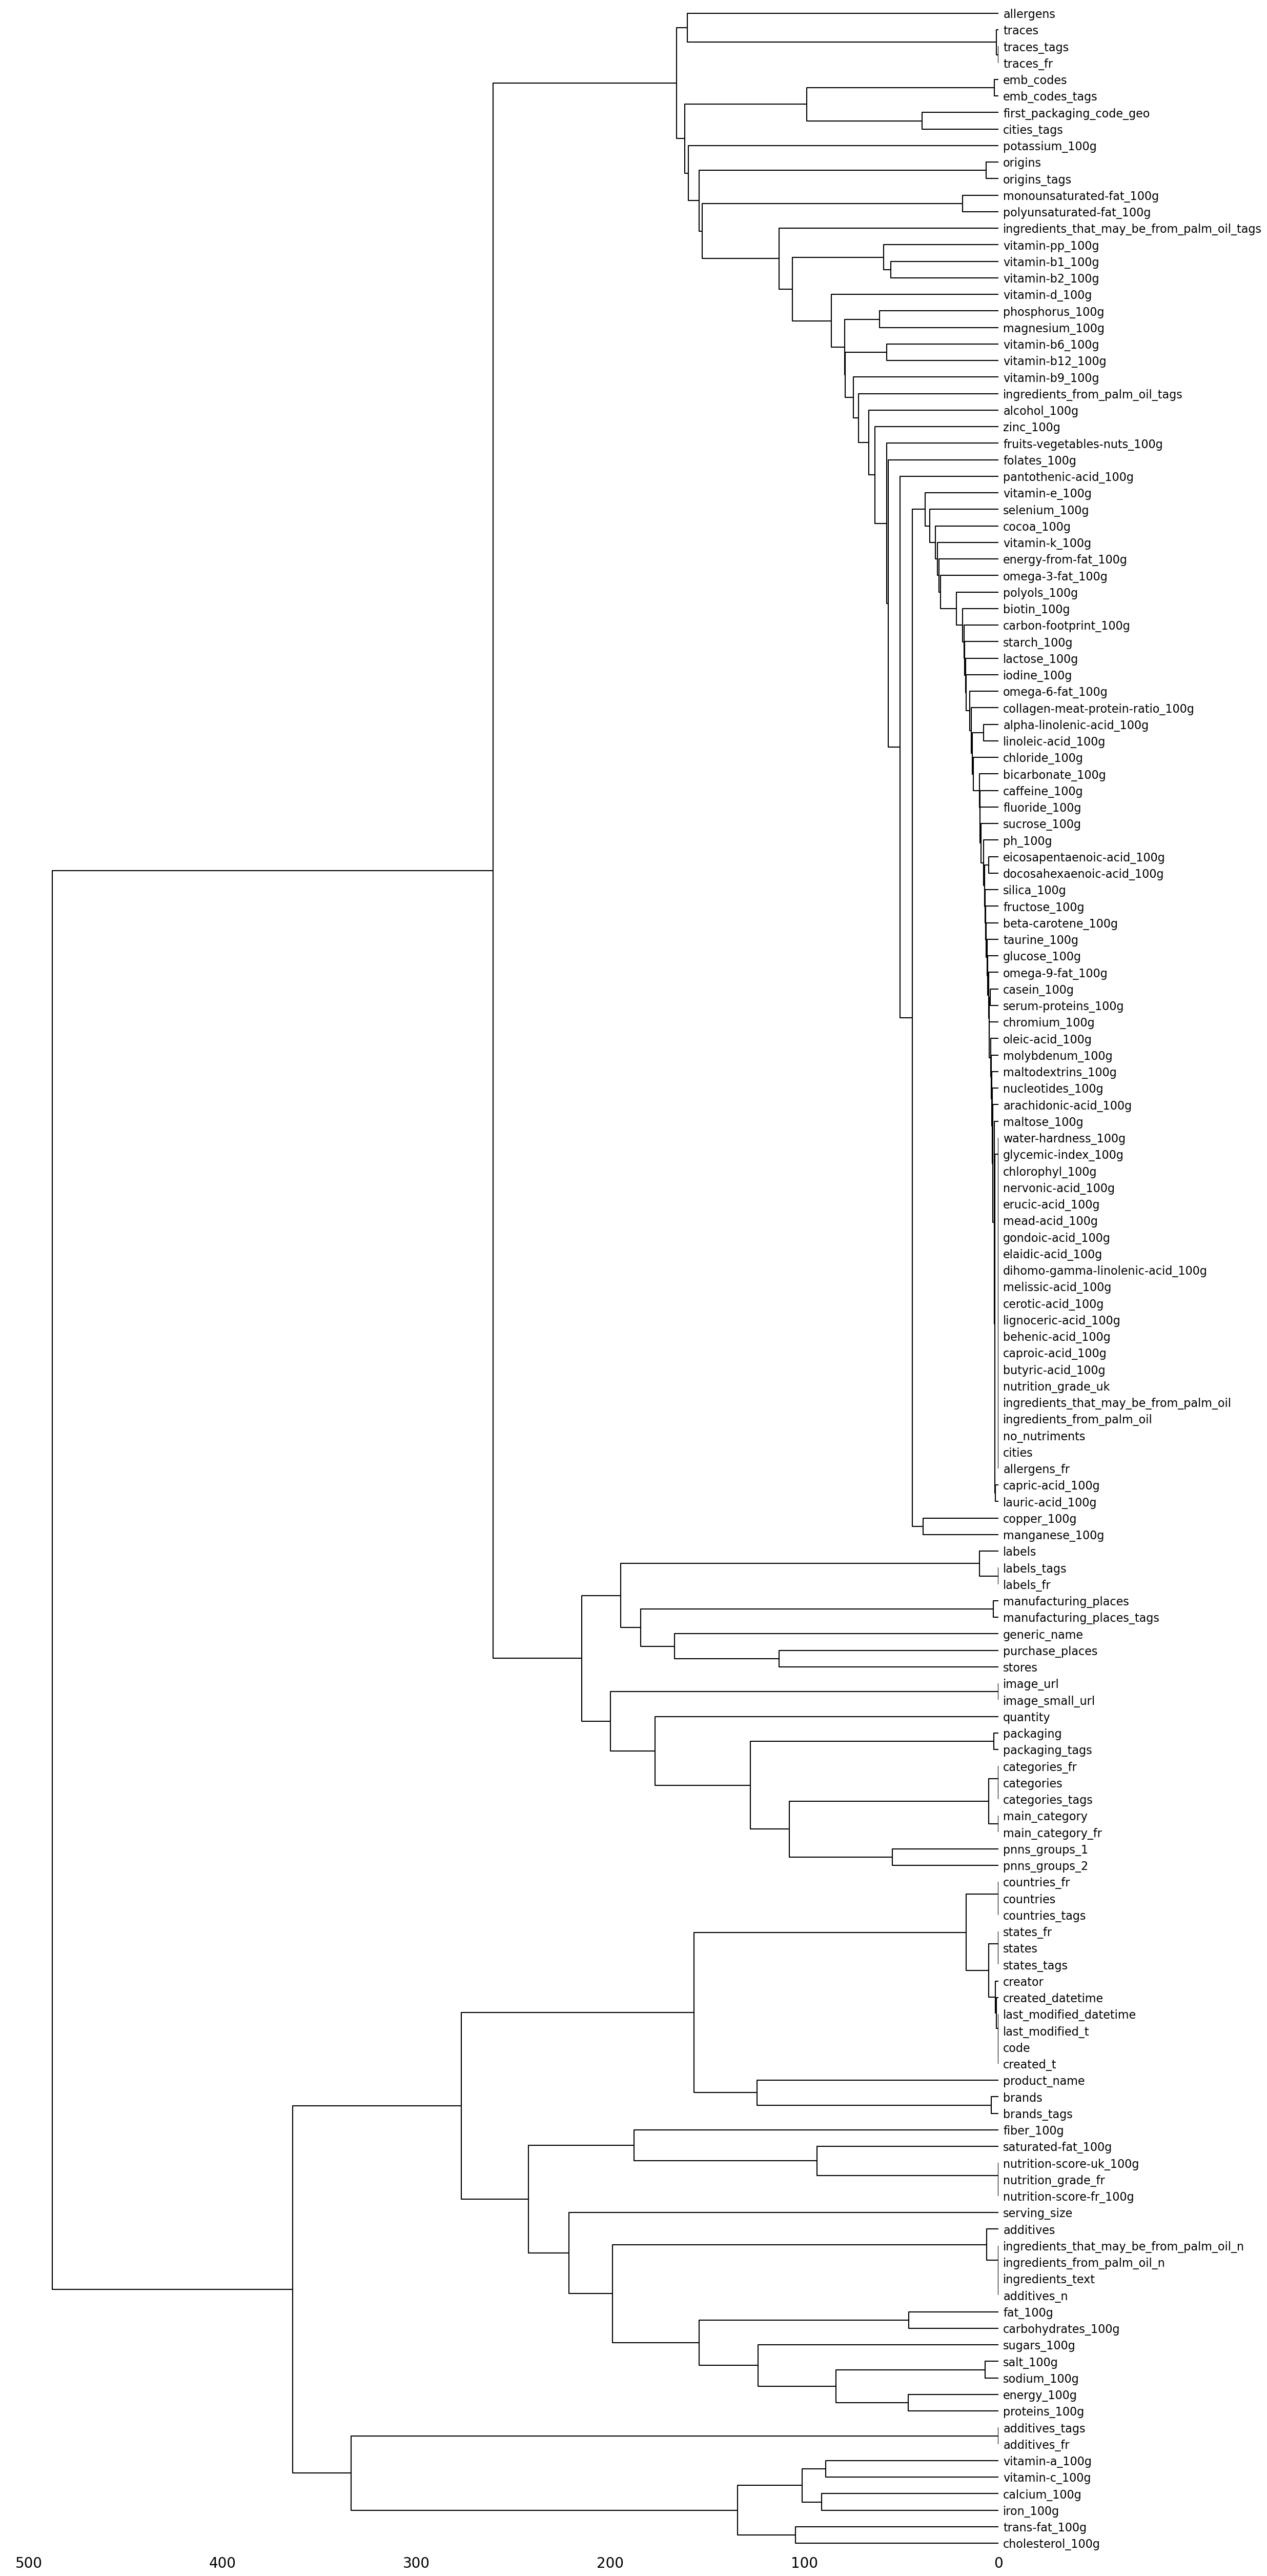

In [9]:
msno.dendrogram(OpenFoodFact)

Bien. Grâce à ces visuels plus que complets, nous avons pu établir le choix de notre variable cible à traiter. Pour rappel, nous recherchons une variable qui contienne plus de 50% de valeurs manquantes et donc le nombre de valeurs uniques soit suffisamment faible pour y effectuer un nettoyage fiable. Il serait donc préférable de privilégier le choix d'une variable qualitative.

Ainsi, grâce aux graphiques ci-dessus et la liste des variables au format string selon leurs nombres de valeurs uniques. Nous avons décider de prendre pour cible la variable "pnns_groups_1". En effet, "pnns_groups_1" non seulement contient environ 71% de valeurs manquantes, mais ses 29% de valeurs remplies sont réparties en 14 valeurs uniques.


## 3. Traitement de la variable cible<a name=5 ></a>

Maintenant que nous avons notre variable cible, nous allons pouvoir démarrer un premier filtrage massif en ne conservant que les 21% de produits d'Open Food Facts ayant la valeur "pnns_groups_1" entrée. Le dataset filtré nous servira de support de travail pour la suite des opérations. Nous allons le nommer Open_Food_Fact, de manière à ne pas perdre le dataset d'origine.

Une fois le support de travail crée, nous allons analyser les composantes de notre variable cible et procéder à un nettoyage si nous l'estimons nécessaire : 

In [10]:
OpenFoodFact['pnns_groups_1'].value_counts()

pnns_groups_1
unknown                    22624
Sugary snacks              12368
Beverages                   9033
Milk and dairy products     8825
Cereals and potatoes        8442
Fish Meat Eggs              8041
Composite foods             6747
Fruits and vegetables       5908
Fat and sauces              5216
Salty snacks                2809
fruits-and-vegetables        987
sugary-snacks                496
cereals-and-potatoes          16
salty-snacks                   1
Name: count, dtype: int64

Un nettoyage des valeurs de cette variable est effectivement plus que nécessaire : 
- Tout d'abord, nous allons transformer toutes les valeurs "unknown" en valeurs nulles. Une fois fait, nous les retirerons de notre dataset car jugées inutiles.
- Enfin, nous allons renommer les valeurs qui contiennent des tirets en trop pour qu'elles puissent se ranger aux véritables composantes auxquelles elles appartiennent.

Il existe également une variable nommée "pnns_groups_2" qui semblerait constituer un sous-groupe de "pnns_group_1" dans la mesure où leurs taux de remplissage sont très proches en termes de chiffres et où il contiendrait hypothétiquement 42 valeurs uniques, ce qui demeure un chiffre relativement faible par rapport au volume d'Open Food Facts. Nous y opérerons ainsi les mêmes traitements car la présence de cette variable parmi notre sélection peut s'avérer utile pour la suite des opérations : 

In [11]:
import numpy as np

OpenFoodFact['pnns_groups_1'].replace({'unknown': np.nan, 'sugary-snacks': 'Sugary snacks',
                                        'cereals-and-potatoes':'Cereals and potatoes',
                                        'fruits-and-vegetables':'Fruits and vegetables',
                                        'salty-snacks':'Salty snacks'}, inplace=True)
OpenFoodFact.drop(OpenFoodFact.loc[OpenFoodFact['pnns_groups_1'].isnull(),:].index, inplace=True)
OpenFoodFact['pnns_groups_2'].value_counts()

pnns_groups_2
One-dish meals                      5546
Sweets                              4698
Biscuits and cakes                  4561
Non-sugared beverages               4302
Cereals                             4106
Cheese                              4024
Dressings and sauces                3602
Milk and yogurt                     3297
Processed meat                      3247
Chocolate products                  3109
Vegetables                          2840
Fish and seafood                    2638
Sweetened beverages                 2170
Appetizers                          2101
Fruits                              2068
Fruit juices                        1924
Bread                               1838
Meat                                1694
Fats                                1614
Breakfast cereals                   1408
vegetables                           934
Legumes                              925
Dairy desserts                       783
Ice cream                            721
Nu

Ici aussi nous allons avoir besoin de modifier le nom de certaines valeurs en y ajoutant des majuscules. Une fois fait, nous allons nous assurer de la dépendance de "pnns_groups_2" vis-à-vis de "pnns_groups_1" en établissant une série de listes : 

In [12]:
OpenFoodFact['pnns_groups_2'].replace({'cereals': 'Cereals', 'fruits': 'Fruits','nuts':'Nuts','legumes':'Legumes',
                                        'vegetables':'Vegetables','pastries':'Pastries'}, inplace=True)

for i in list(OpenFoodFact['pnns_groups_1'].value_counts().index) : 
    print(i," :\n",list(OpenFoodFact[OpenFoodFact['pnns_groups_1']==i]['pnns_groups_2'].value_counts().index),"\n")

Sugary snacks  :
 ['Sweets', 'Biscuits and cakes', 'Chocolate products', 'Pastries'] 

Beverages  :
 ['Non-sugared beverages', 'Sweetened beverages', 'Fruit juices', 'Fruit nectars', 'Artificially sweetened beverages'] 

Milk and dairy products  :
 ['Cheese', 'Milk and yogurt', 'Dairy desserts', 'Ice cream'] 

Cereals and potatoes  :
 ['Cereals', 'Bread', 'Breakfast cereals', 'Legumes', 'Potatoes'] 

Fish Meat Eggs  :
 ['Processed meat', 'Fish and seafood', 'Meat', 'Eggs'] 

Fruits and vegetables  :
 ['Vegetables', 'Fruits', 'Soups', 'Dried fruits'] 

Composite foods  :
 ['One-dish meals', 'Sandwich', 'Pizza pies and quiche'] 

Fat and sauces  :
 ['Dressings and sauces', 'Fats'] 

Salty snacks  :
 ['Appetizers', 'Nuts', 'Salty and fatty products'] 



La liste présentée ci-dessus nous permet de confirmer qu'il ne peut exister une valeur unique de "pnns_groups_2" pouvant appartenir à plusieurs groupes de "pnns_groups_1" à la fois. Par exemple, tout produit appartenant au sous-groupe "Fruits" aura pour seule et unique valeur "pnns_groups_1" "Fruits and vegetables". Autrement dit, si nous connaissons la valeur de "pnns_groups_2", nous sommes en mesure d'identifier d'entrée de jeu la valeur de "pnns_groups_1"

Notre valeur cible a donc été identifiée et traitée en conséquence. Il ne reste donc plus qu'à selectionner une petite dizaine de features à conserver avant de pouvoir passer aux étapes suivantes.

## 4. Sélection & Traitement des Features<a name=6 ></a>

Le choix de nos variables se détermine également selon les taux de remplissage desdites variables. Cependant, contrairement à l'opération précédente, le choix se porte ici sur des taux de remplissage élevés. De plus, sachant que des analyses multi-variées ainsi que des études de corrélation sont à prévoir, ce sont surtout les variables quantitatives qu'il faudra privilégier cette fois-ci.

Voilà pourquoi nous avons effectué le choix nos variables autour des informations nutritionnelles. Nous y avons effectivement sélectionné celles contenant suffisamment de valeurs et constituant les éléments plus essentielles d'un point de vue métier. Voici la liste des variables finales conservées : 
- code (identifiant)
- pnns_group_1 (variable cible)
- pnns_group_2 (variable complémentaire)
- sodium_100g
- salt_100g
- fiber_100g
- sugars_100g
- alcohol_100g (nécessaire pour le nettoyage par approche métier)
- proteins_100g
- fat_100g
- saturated_fat_100g
- carbohydrates_100g
- energy_100g
- nutrition-score-fr_100g

Selon les résultats des analyses qui vont suivre, certaines de ces variables seront jugées inutiles et retirées de notre support  de travail. En attendant, nous pouvons effectuer un premier travail de nettoyage en éliminant tous les produits qui ont 0% des features indiquées. Une fois fait, nous aurons une première analyse solide de nos données : 

In [13]:
Open_Food_Fact = OpenFoodFact.copy()
Open_Food_Fact.drop(Open_Food_Fact.loc[Open_Food_Fact['pnns_groups_1'].isnull(),:].index, inplace=True)

features = ['code','pnns_groups_1','pnns_groups_2','sodium_100g',
            'salt_100g','fiber_100g','sugars_100g','alcohol_100g','proteins_100g','fat_100g','saturated-fat_100g',
            'carbohydrates_100g','energy_100g','nutrition-score-fr_100g']

Open_Food_Fact = Open_Food_Fact[features]

all_na = Open_Food_Fact[Open_Food_Fact["sodium_100g"].isna()
                            & Open_Food_Fact["salt_100g"].isna()
                            & Open_Food_Fact["fiber_100g"].isna()
                            & Open_Food_Fact["sugars_100g"].isna()
                            & Open_Food_Fact["alcohol_100g"].isna()
                            & Open_Food_Fact["proteins_100g"].isna()
                            & Open_Food_Fact["fat_100g"].isna()
                            & Open_Food_Fact["saturated-fat_100g"].isna()
                            & Open_Food_Fact["carbohydrates_100g"].isna()
                            & Open_Food_Fact["energy_100g"].isna()
                            & Open_Food_Fact["nutrition-score-fr_100g"].isna()]

Open_Food_Fact.drop(labels = all_na.index, inplace = True)
print(totalinfo(Open_Food_Fact),'\n')
Open_Food_Fact.describe()

La dataframe est vide à 14.000000000000002 %
None 



sodium_100g     salt_100g    fiber_100g   sugars_100g  alcohol_100g  \
count  52004.000000  52009.000000  33173.000000  51852.000000   1273.000000   
mean       0.345930      0.878585      2.721188     13.089981      0.241201   
std        1.039142      2.639544      3.939128     18.683412      1.837963   
min        0.000000      0.000000      0.000000     -0.100000      0.000000   
25%        0.020000      0.050800      0.357000      1.000000      0.000000   
50%        0.196850      0.500000      1.600000      4.200000      0.000000   
75%        0.472441      1.200000      3.500000     16.000000      0.000000   
max      117.165354    297.600000     94.800000    134.000000     40.000000   

       proteins_100g      fat_100g  saturated-fat_100g  carbohydrates_100g  \
count   54553.000000  52680.000000        51649.000000        52269.000000   
mean        7.481494     13.552209            5.425644           27.380236   
std         7.317057     17.747464            8.523386           27.393096   
min         0.000000      0.000000            0.000000            0.000000   
25%         1.500000      1.000000            0.200000            4.000000   
50%         5.820000      6.200000            1.800000           13.800000   
75%        10.600000     22.000000            7.580000           53.000000   
max        86.000000    380.000000          210.000000          190.000000   

        energy_100g  nutrition-score-fr_100g  
count  55030.000000             50597.000000  
mean    1092.028355                 8.336245  
std      814.897824                 9.185674  
min        0.000000               -15.000000  
25%      368.000000                 1.000000  
50%      992.000000                 8.000000  
75%     1646.000000                15.000000  
max    22000.000000                40.000000

In [14]:
Open_Food_Fact.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55896 entries, 174 to 320763
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   code                     55896 non-null  object 
 1   pnns_groups_1            55896 non-null  object 
 2   pnns_groups_2            55896 non-null  object 
 3   sodium_100g              52004 non-null  float64
 4   salt_100g                52009 non-null  float64
 5   fiber_100g               33173 non-null  float64
 6   sugars_100g              51852 non-null  float64
 7   alcohol_100g             1273 non-null   float64
 8   proteins_100g            54553 non-null  float64
 9   fat_100g                 52680 non-null  float64
 10  saturated-fat_100g       51649 non-null  float64
 11  carbohydrates_100g       52269 non-null  float64
 12  energy_100g              55030 non-null  float64
 13  nutrition-score-fr_100g  50597 non-null  float64
dtypes: float64(11), object(3

D'un jeu de données initialement vide à 76%, ce chiffre est maintenant passé à 14%, ce qui démontre un support de travail davantage solide. Cependant, nous n'en restons pas là. Avec notre première analyse effectuée via de tableau ci-dessus, nous pouvons constater qu'un grand travail de nettoyage de nos données est encore à faire, et c'est ce qui constituera nos 2 prochaines grandes parties.

Pour autant, nous pouvons d'ores et déjà procéder à un traitement massif grâce à une approche métier : 
- Pour commencer, nous savons que les valeurs indiquées dans nos valeurs nutritionnelles correspondent à un taux présent sur 100g. Or, nous voyons déjà dans notre tableau qu'il existe des valeurs supérieures à 100 que nous nous devons donc de supprimer.
- Concernant la variable "nutrition-score-fr_100g", aucune anomalie n'est à détecter pour l'instant car le calcul d'un nutri-score aboutit bel et bien à un résultat situé entre -15 et 40.
- Certains features sont des sous-catégories d'autres features et ne peuvent donc pas avoir un taux supérieur à leur catégorie (la valeur du sodium ne peut être supérieure à celle du sel, ni celle du sucre à celle des glucides(carbohydrates), et enfin, ni celle de la graisse saturée à celle des lipides(fat)). Il faut donc remplacer les valeurs en fonction.
- Enfin, le calcul de l'énergie se fait selon la formule suivante : energy = (proteins x 17) + (fat x 37) + (carbohydrates x 17) + (alcohol x 29). L'enjeu est donc de comparer les résultats de ce calcul aux chiffres observés dans la variable et de traiter ceux qui en sont les plus éloignés en conséquence. Une fois fait, nous n'aurons plus besoin de la variable "alcohol_100g" pour la suite de notre procédure.

Après avoir effectué ce nettoyage par approche métier, nous passerons donc à un nettoyage par approche statistique dans notre deuxième grande partie, à savoir l'identification et le traitement des valeurs aberrantes de notre table.

# II. Identification & traitement des valeurs aberrantes <a name=7 ></a>

In [15]:
Open_Food_Fact = Open_Food_Fact.rename(columns = {'energy_100g': 'energy', 'nutrition-score-fr_100g': 'nutrition-score-fr'})

elements = list(Open_Food_Fact.columns[Open_Food_Fact.columns.str.endswith('_100g')])

for i in elements :
    Open_Food_Fact.loc[Open_Food_Fact[i]>100,i] = np.nan
    Open_Food_Fact.loc[Open_Food_Fact[i]<0,i] = np.nan
    
Open_Food_Fact = Open_Food_Fact.rename(columns = {'energy': 'energy_100g', 'nutrition-score-fr': 'nutrition-score-fr_100g'})
    
Open_Food_Fact['carbohydrates_100g'] = Open_Food_Fact.apply(lambda x: x['sugars_100g'] if x['sugars_100g'] > x['carbohydrates_100g'] else x['carbohydrates_100g'], axis = 1)
Open_Food_Fact['fat_100g'] = Open_Food_Fact.apply(lambda x: x['saturated-fat_100g'] if x['saturated-fat_100g'] > x['fat_100g'] else x['fat_100g'], axis = 1)
Open_Food_Fact['salt_100g'] = Open_Food_Fact.apply(lambda x: x['sodium_100g'] if x['sodium_100g'] > x['salt_100g'] else x['salt_100g'], axis = 1)

Open_Food_Fact['energy+'] = Open_Food_Fact['energy_100g'].fillna(0)-((Open_Food_Fact['proteins_100g'].fillna(0)*17)+(Open_Food_Fact['fat_100g'].fillna(0)*37)+(Open_Food_Fact['carbohydrates_100g'].fillna(0)*17)+(Open_Food_Fact['alcohol_100g'].fillna(0)*29))
Open_Food_Fact['energy+'] = Open_Food_Fact['energy+'].abs()
Open_Food_Fact.loc[Open_Food_Fact['energy+'] > Open_Food_Fact['energy+'].quantile(0.75)]['energy_100g'] = np.nan
Open_Food_Fact.drop(columns=['energy+'], inplace=True)

Open_Food_Fact.drop(columns=['alcohol_100g'], inplace=True)

all_na = Open_Food_Fact[Open_Food_Fact["sodium_100g"].isna()
                            & Open_Food_Fact["salt_100g"].isna()
                            & Open_Food_Fact["fiber_100g"].isna()
                            & Open_Food_Fact["sugars_100g"].isna()
                            & Open_Food_Fact["proteins_100g"].isna()
                            & Open_Food_Fact["fat_100g"].isna()
                            & Open_Food_Fact["saturated-fat_100g"].isna()
                            & Open_Food_Fact["carbohydrates_100g"].isna()
                            & Open_Food_Fact["energy_100g"].isna()
                            & Open_Food_Fact["nutrition-score-fr_100g"].isna()]

Open_Food_Fact.drop(labels = all_na.index, inplace = True)

Open_Food_Fact.drop(columns=['code','pnns_groups_2']).groupby(['pnns_groups_1']).quantile(0.75)

C:\Users\Alex-\AppData\Local\Temp\ipykernel_14360\1398840218.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Open_Food_Fact.loc[Open_Food_Fact['energy+'] > Open_Food_Fact['energy+'].quantile(0.75)]['energy_100g'] = np.nan


sodium_100g  salt_100g  fiber_100g  sugars_100g  \
pnns_groups_1                                                              
Beverages                   0.016900   0.042925         0.5         11.0   
Cereals and potatoes        0.425197   1.080000         6.8          6.9   
Composite foods             0.488642   1.240000         2.6          3.2   
Fat and sauces              0.829250   2.106295         1.6          6.1   
Fish Meat Eggs              0.984252   2.500000         0.5          1.0   
Fruits and vegetables       0.275591   0.700000         3.2         13.0   
Milk and dairy products     0.511811   1.300000         0.5         13.0   
Salty snacks                0.780000   1.981200         5.8          5.7   
Sugary snacks               0.230000   0.584200         4.2         52.0   

                         proteins_100g  fat_100g  saturated-fat_100g  \
pnns_groups_1                                                          
Beverages                          0.6       0.5                 0.1   
Cereals and potatoes              12.0       7.0                 1.8   
Composite foods                   10.0      10.0                 3.5   
Fat and sauces                     1.9      80.0                13.0   
Fish Meat Eggs                    22.0      20.0                 7.0   
Fruits and vegetables              2.4       0.9                 0.3   
Milk and dairy products           17.0      25.0                17.0   
Salty snacks                      13.8      37.0                 6.9   
Sugary snacks                      7.3      30.0                16.0   

                         carbohydrates_100g  energy_100g  \
pnns_groups_1                                              
Beverages                              11.4        218.0   
Cereals and potatoes                   72.0       1610.0   
Composite foods                        22.1        916.0   
Fat and sauces                          9.4       2982.0   
Fish Meat Eggs                          2.0       1079.0   
Fruits and vegetables                  15.0        354.0   
Milk and dairy products                14.0       1243.0   
Salty snacks                           60.0       2320.0   
Sugary snacks                          67.0       2190.0   

                         nutrition-score-fr_100g  
pnns_groups_1                                     
Beverages                                   13.0  
Cereals and potatoes                         7.0  
Composite foods                              5.0  
Fat and sauces                              17.0  
Fish Meat Eggs                              17.0  
Fruits and vegetables                        0.0  
Milk and dairy products                     14.0  
Salty snacks                                16.0  
Sugary snacks                               23.0

Nous avons vu dans notre précédent tableau qu'il existait bel et bien des valeurs aberrantes, au-delà de celles identifiées par approche métier. Pour pouvoir les traiter, nous aurons recours à la méthode dite interquartile. Attention, cependant, à appliquer cette méthode en fonction des valeurs catégorielles auxquelles chaque produit appartient.

En effet, le tableau ci-dessus affiche les Q3 de chaque variable en fonction des valeurs de "pnns_groups_1", et le moins qu'on puisse dire c'est que leurs chiffres sont considérablement variés. Voilà pourquoi, pour un traitement optimale, nous aurons recours à la variable "pnns_groups_2" pour déterminer les chiffres de Q1, Q3 et IQR (écart interquartile) de chacune des catégories de ce groupe, et d'éliminer les valeurs abérrantes situées au-dessus ou en dessous de chacun de ces chiffres : 

In [16]:
elements = [col for col in Open_Food_Fact.columns if Open_Food_Fact[col].dtype != object]
foodgroups = list(Open_Food_Fact['pnns_groups_2'].value_counts().index)

for i in foodgroups :
    for j in elements :
        Q1 = Open_Food_Fact.loc[Open_Food_Fact['pnns_groups_2'] == i, j].quantile(0.25)
        Q3 = Open_Food_Fact.loc[Open_Food_Fact['pnns_groups_2'] == i, j].quantile(0.75)
        IQR = Q3 - Q1
        lower_range = Q1 - 1.5 * IQR
        upper_range = Q3 + 1.5 * IQR
        outliers = (Open_Food_Fact['pnns_groups_2'] == i) & ((Open_Food_Fact[j] < lower_range) | (Open_Food_Fact[j] > upper_range))
        Open_Food_Fact.loc[outliers, j] = np.nan

all_na = Open_Food_Fact[Open_Food_Fact["salt_100g"].isna()
                            & Open_Food_Fact["fiber_100g"].isna()
                            & Open_Food_Fact["sugars_100g"].isna()
                            & Open_Food_Fact["proteins_100g"].isna()
                            & Open_Food_Fact["fat_100g"].isna()
                            & Open_Food_Fact["saturated-fat_100g"].isna()
                            & Open_Food_Fact["carbohydrates_100g"].isna()
                            & Open_Food_Fact["energy_100g"].isna()
                            & Open_Food_Fact["nutrition-score-fr_100g"].isna()]

Open_Food_Fact.drop(labels = all_na.index, inplace = True)

Open_Food_Fact.describe()

sodium_100g     salt_100g    fiber_100g   sugars_100g  proteins_100g  \
count  48374.000000  48387.000000  30811.000000  48110.000000   51910.000000   
mean       0.282186      0.717190      2.270363     12.092939       7.231395   
std        0.338841      0.861248      2.605575     17.138331       7.007579   
min        0.000000      0.000000      0.000000      0.000000       0.000000   
25%        0.015748      0.040000      0.200000      1.000000       1.400000   
50%        0.177165      0.450000      1.500000      3.900000       5.700000   
75%        0.433071      1.100000      3.200000     14.300000      10.000000   
max        2.480315      6.300000     19.500000     93.400000      45.800000   

           fat_100g  saturated-fat_100g  carbohydrates_100g   energy_100g  \
count  49119.000000        47795.000000        49051.000000  50950.000000   
mean      13.076438            5.131198           26.963975   1081.726214   
std       17.349436            8.322240           27.328139    802.649814   
min        0.000000            0.000000            0.000000      0.000000   
25%        0.926500            0.200000            3.800000    355.000000   
50%        5.800000            1.600000           13.000000    975.000000   
75%       21.100000            6.700000           53.000000   1653.000000   
max      100.000000          100.000000          100.000000   3883.000000   

       nutrition-score-fr_100g  
count             48399.000000  
mean                  8.300833  
std                   9.192319  
min                 -15.000000  
25%                   1.000000  
50%                   8.000000  
75%                  15.000000  
max                  33.000000

Dans le tableau ci-dessus, nous pouvons voir que les valeurs aberrantes ont bien été traitées de manière appropriée. Il est bon d'ajouter que compte tenu de la nature de notre jeu de données, il n'est pas surprenant d'avoir dans notre liste des produits constitués à 100% de graisse, saturée ou non, ou de glucide. Pour la même raison, il est normal d'observer des écarts-types importants à l'intérieur de chacune de nos variables.

Pour autant, le traitement des valeurs abérrantes additionné à celui par approche métier fait que l'on se retrouve avec davantage de valeurs manquantes qu'au départ. Afin de pouvoir poursuivre notre étude, il est donc nécessaire de les traiter également, ce que nous allons faire dans notre troisième grande partie.

# III. Identification & traitement des valeurs manquantes <a name=8 ></a>

Maintenant que notre opération de filtrage et de traitement massif est accomplie, il serait intéressant de recourir de nouveau aux graphique de la librairie missingno. En effet, non seulement ils permettent de visualiser l'importance des valeurs manquantes dans notre jeu de données, mais ils calculent et illustrent de manière très fiable les possibles corrélations présentes de ledit jeu de données au niveau de ces valeurs manquantes : 

<Axes: >

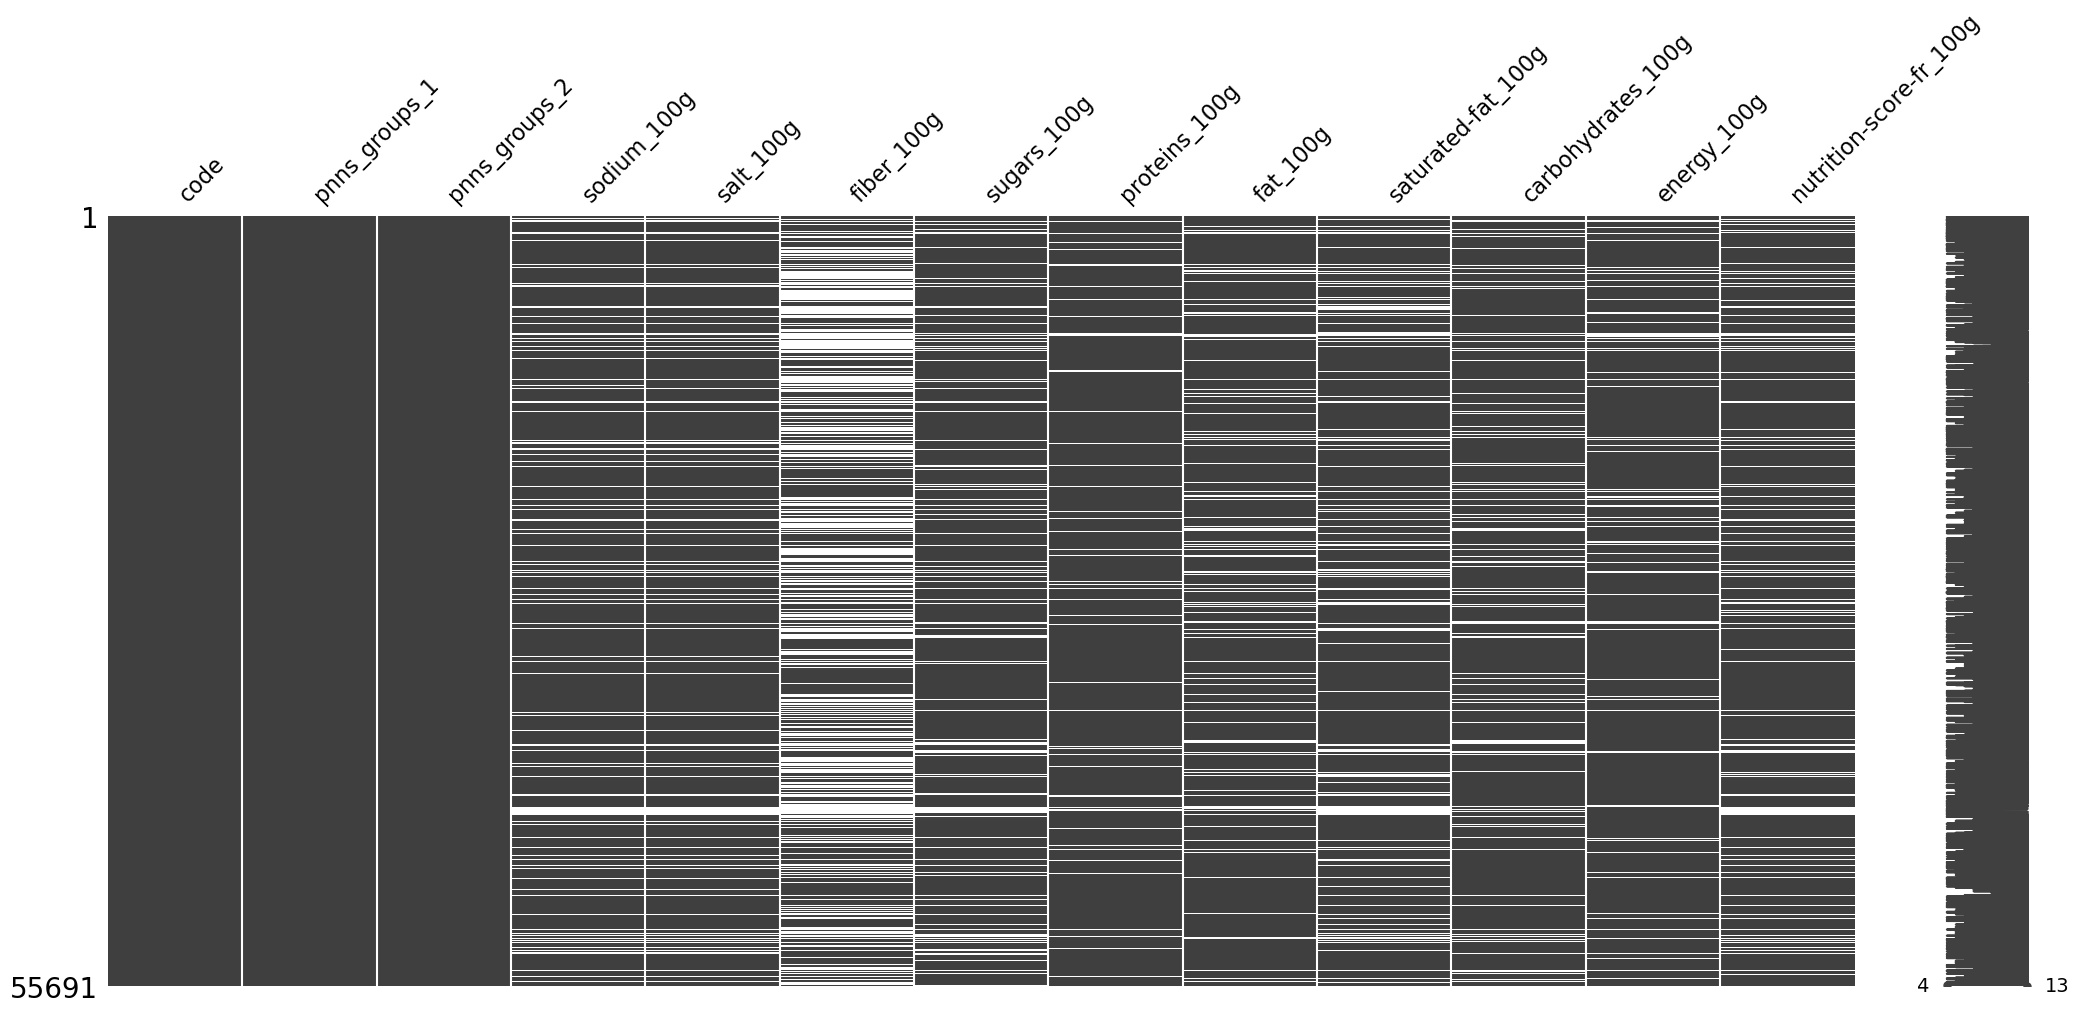

In [17]:
msno.matrix(Open_Food_Fact)

<Axes: >

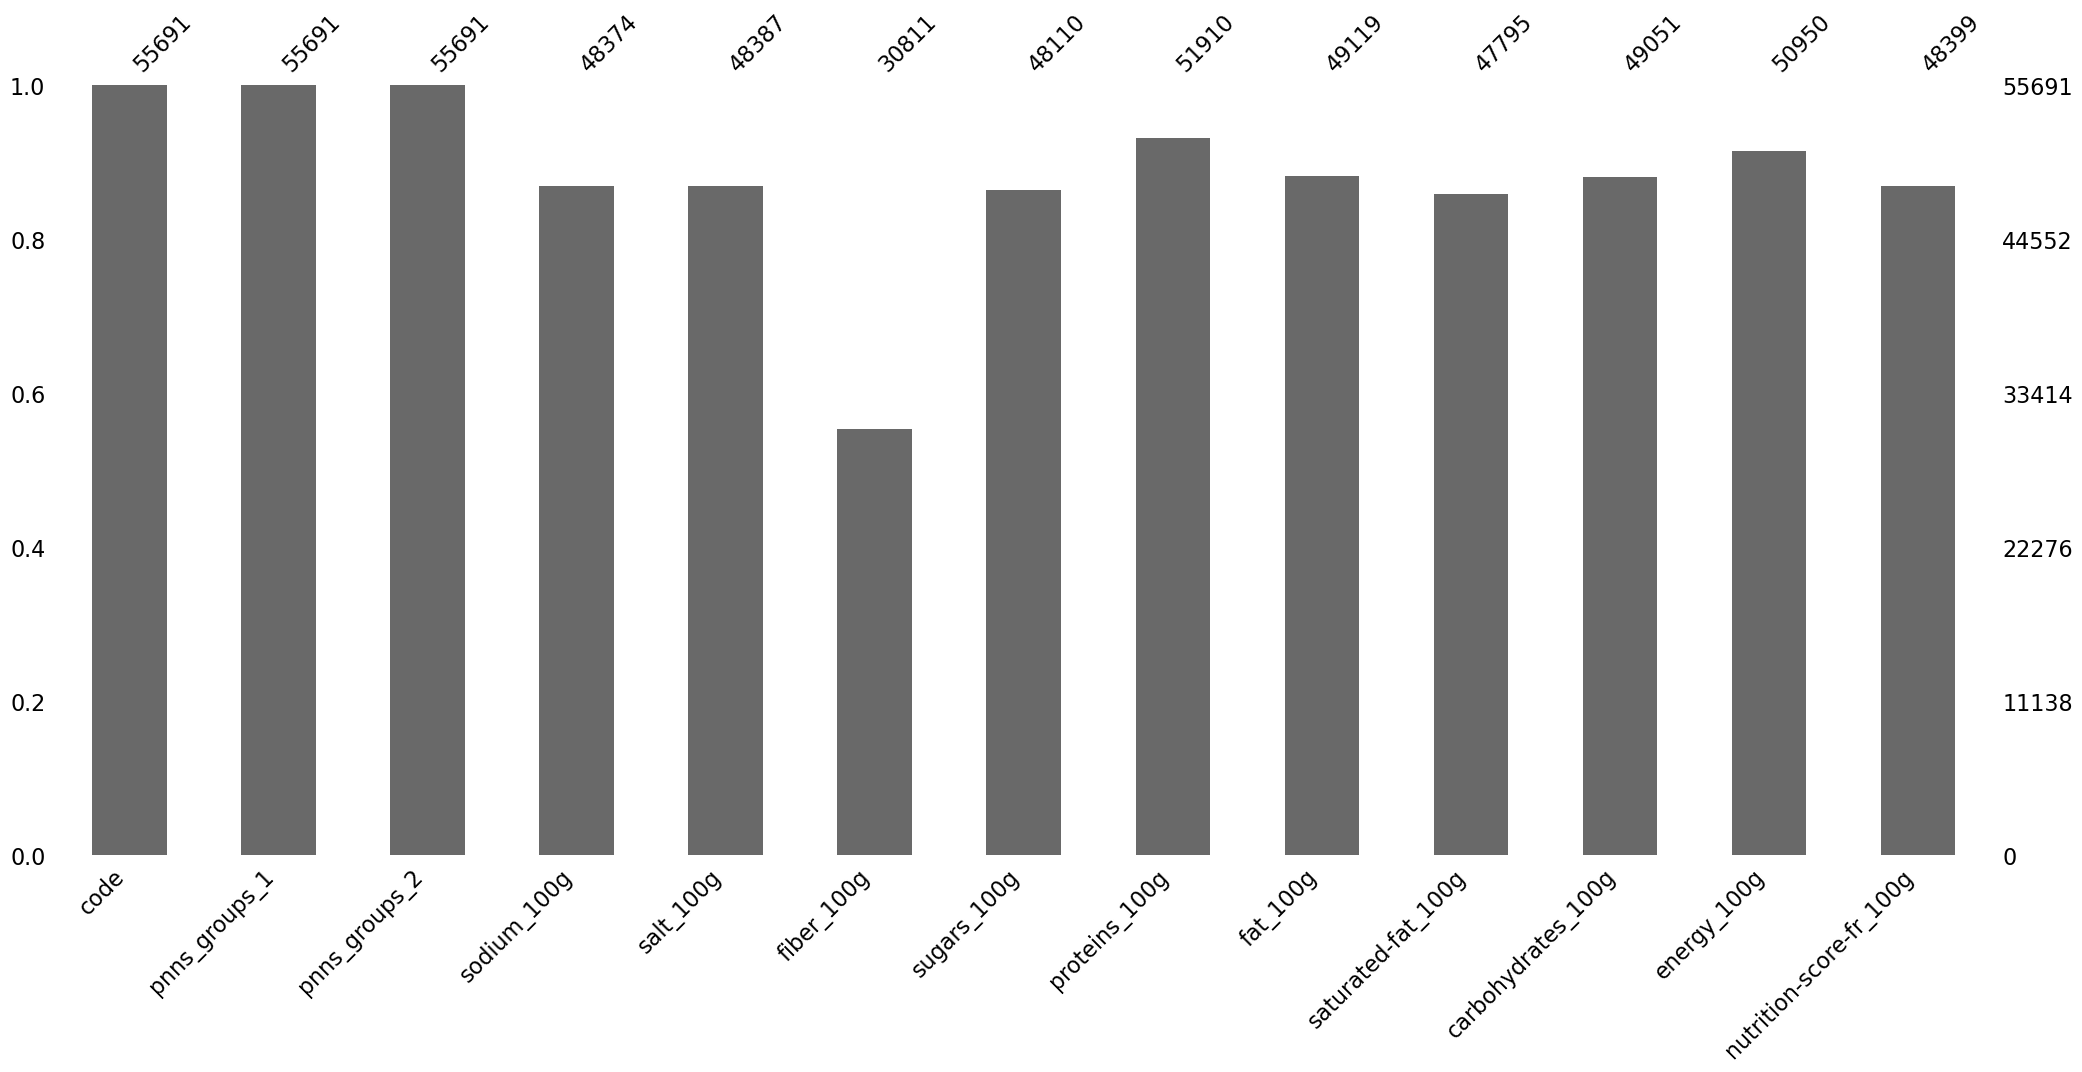

In [18]:
msno.bar(Open_Food_Fact)

<Axes: >

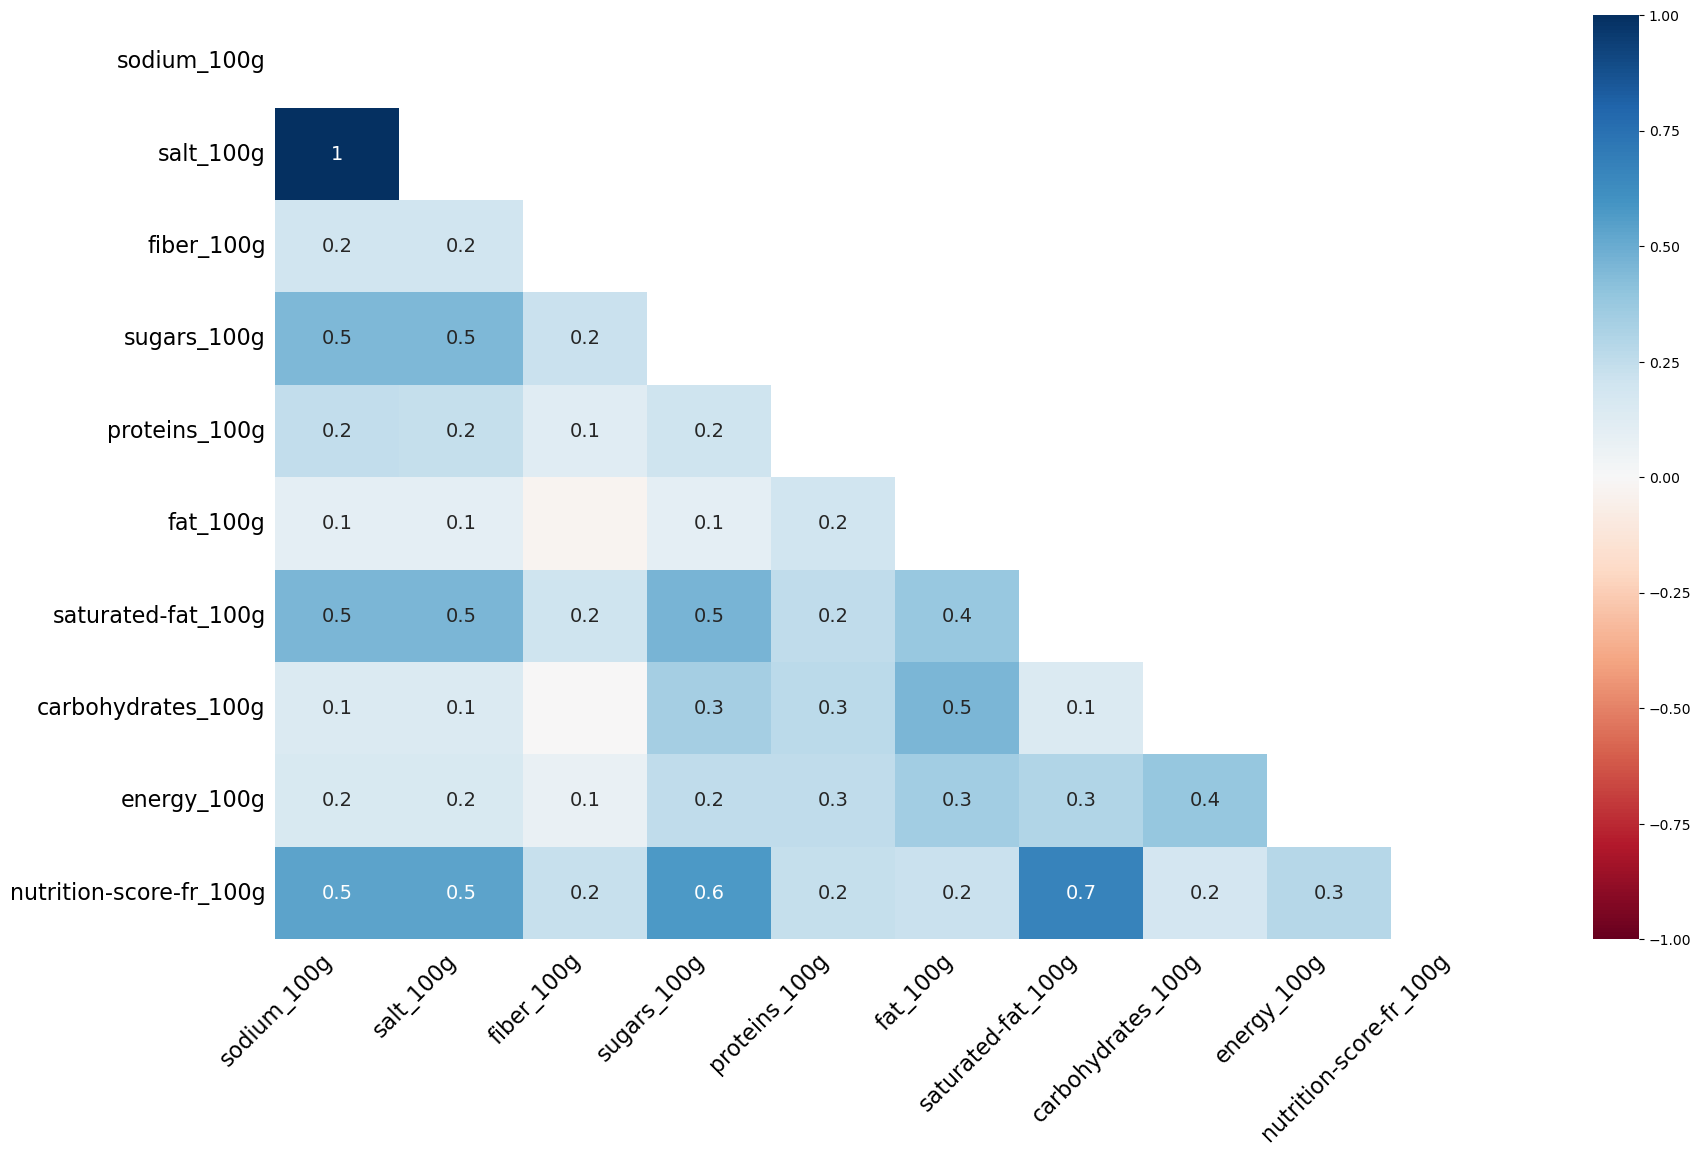

In [19]:
msno.heatmap(Open_Food_Fact)

<Axes: >

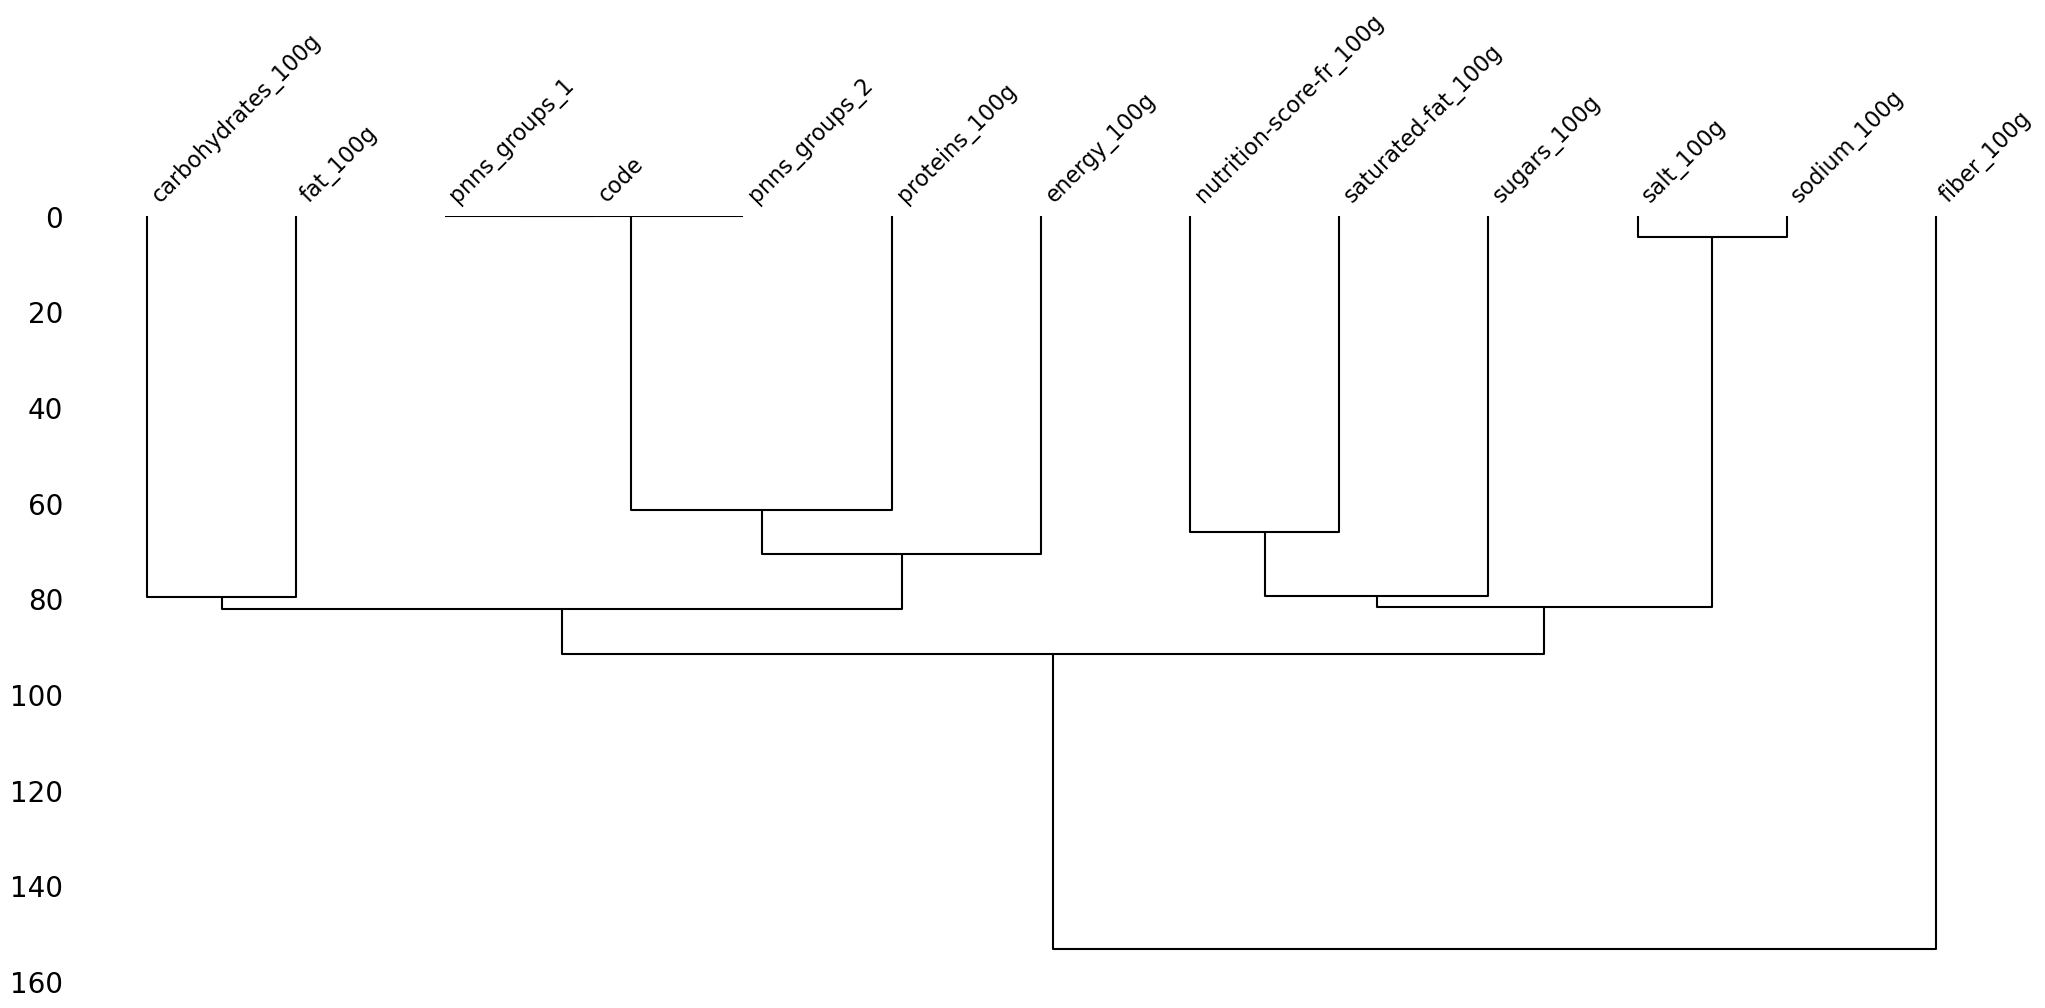

In [20]:
msno.dendrogram(Open_Food_Fact)

Si l'on en croit les graphiques ci-dessus, nous pouvons constater que la quasi-totalité de nos variables contiennent suffisamment de valeurs pour pouvoir effectuer nos analyses et ainsi étudier la faisabilité de remplir notre variable cible de manière prédictive. Il faut cependant noter 2 phénomènes : 
- la variable "fiber_100g" contient une proportion nettement plus élevée de valeurs manquantes que le reste de notre dataset. De ce fait, même si nous parvenons à imputer ces valeurs manquantes, le résultat de cette opération sera peu fiable et aura un impact faible sur nos analyses. Voilà pourquoi nous allons écarter cette variable pour la suite des évènements.
- de même que nous pouvons nous permettre d'écarter la variable "sodium_100g" dans la mesure où la présence ou non de valeurs manquantes dans ses chiffres est parfaitement corrélée avec celle de la variable "salt_100g". Nous pouvons dire par l'approche métier que cette parfaite corrélation est logique.

Pour le reste des features, nous allons donc pouvoir imputer les valeurs manquantes. Pour cela, nous allons proposer et comparer 4 méthodes d'imputation : 
- la méthode par moyenne : les valeurs manquantes sont simplement remplacées par la moyenne de la variable
- la méthode par médiane : les valeurs manquantes sont simplement remplacées par la médiane de la variable
- la méthode itérative : les valeurs manquantes sont remplacées par des estimations basées sur les autres valeurs disponibles dans le jeu de données. Cette méthode fonctionne en itérant à travers les variables avec des valeurs manquantes et en utilisant des modèles de prédiction pour estimer ces valeurs manquantes à partir des autres variables.
- la méthode knn : les valeurs manquantes sont remplacées en se basant sur les valeurs des voisins les plus proches. Cette méthode utilise les données complètes pour identifier les voisins les plus proches d'une observation avec des valeurs manquantes, puis utilise les valeurs de ces voisins pour estimer la valeur manquante.

Là encore, il est nécessaire d'effectuer ces imputations en se basant sur la valeur "pnns_groups_2" des produits afin de garantir un résultat optimal dans notre contexte : 

In [21]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.impute import KNNImputer

Open_Food_Fact.drop(columns=['sodium_100g','fiber_100g'], inplace=True)

elements = [col for col in Open_Food_Fact.columns if Open_Food_Fact[col].dtype != object]

Open_Food_Fact_mean = Open_Food_Fact.copy()
Open_Food_Fact_median = Open_Food_Fact.copy()
Open_Food_Fact_iter = Open_Food_Fact.copy()
Open_Food_Fact_iter_energy = Open_Food_Fact.copy()
Open_Food_Fact_iter_nutriscore = Open_Food_Fact.copy()
Open_Food_Fact_knn = Open_Food_Fact.copy()

for i in foodgroups:
    subset = Open_Food_Fact[Open_Food_Fact['pnns_groups_2'] == i][elements]
    nan_columns = subset.columns[subset.isnull().all()]
    subset[nan_columns] = subset[nan_columns].fillna(0)
    
    mean_imputer = SimpleImputer(strategy='mean')
    mean_imputed = mean_imputer.fit_transform(subset)
    Open_Food_Fact_mean.loc[Open_Food_Fact_mean['pnns_groups_2'] == i, elements] = mean_imputed
    
    median_imputer = SimpleImputer(strategy='median')
    median_imputed = median_imputer.fit_transform(subset)
    Open_Food_Fact_median.loc[Open_Food_Fact_median['pnns_groups_2'] == i, elements] = median_imputed
    
    iter_imputer = IterativeImputer(min_value=0, max_value=100, n_nearest_features=4, random_state=50)
    iter_imputed = iter_imputer.fit_transform(subset)
    Open_Food_Fact_iter.loc[Open_Food_Fact_iter['pnns_groups_2'] == i, elements] = iter_imputed
        
    iter_imputer_energy = IterativeImputer(min_value=0, max_value=3700, n_nearest_features=4, random_state=50)
    iter_imputed_energy = iter_imputer_energy.fit_transform(subset)
    Open_Food_Fact_iter_energy.loc[Open_Food_Fact_iter_energy['pnns_groups_2'] == i, elements] = iter_imputed_energy
    
    iter_imputer_nutriscore = IterativeImputer(min_value=-15, max_value=40, n_nearest_features=4, random_state=50)
    iter_imputed_nutriscore = iter_imputer_nutriscore.fit_transform(subset)
    Open_Food_Fact_iter_nutriscore.loc[Open_Food_Fact_iter_nutriscore['pnns_groups_2'] == i, elements] = iter_imputed_nutriscore
    
    knn_imputer = KNNImputer(n_neighbors=4)
    knn_imputed = knn_imputer.fit_transform(subset)
    Open_Food_Fact_knn.loc[Open_Food_Fact_knn['pnns_groups_2'] == i, elements] = knn_imputed
    
Open_Food_Fact_iter['energy_100g']=Open_Food_Fact_iter_energy['energy_100g']
Open_Food_Fact_iter['nutrition-score-fr_100g']=Open_Food_Fact_iter_nutriscore['nutrition-score-fr_100g']

C:\Users\Alex-\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
C:\Users\Alex-\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
C:\Users\Alex-\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
C:\Users\Alex-\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
C:\Users\Alex-\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
C:\Users\Alex-\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not 

C:\Users\Alex-\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
C:\Users\Alex-\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
C:\Users\Alex-\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
C:\Users\Alex-\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
C:\Users\Alex-\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
C:\Users\Alex-\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not 

C:\Users\Alex-\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
C:\Users\Alex-\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
C:\Users\Alex-\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
C:\Users\Alex-\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Nous disposons donc de 4 résultats de 4 différentes méthodes d'imputation de valeurs manquantes. IL s'agit cependant de déterminer laquelle des 4 constitue la plus appropriée pour remplir notre jeu de données à 100% avec une fiabilité de prédiction optimale. Il faut garder en tête que pour chaque variable donnée, une méthode peut mieux convenir qu'une autre et c'est pourquoi la comparaison doit se faire feature par feature.

Pour pouvoir efficacement comparer nos méthodes d'imputation, nous allons effectuer pour chacun d'entre eux le test de Kolmogorov-Smirnov. Il s'agit d'une méthode statistique utilisée pour déterminer si un échantillon de données suit une distribution spécifique. Il est souvent utilisé pour comparer deux échantillons ou pour comparer un échantillon à une distribution théorique, telle que la distribution normale. Si la statistique de test D est inférieure à un certain seuil (par exemple, déterminé à l'aide de tables de valeurs critiques), alors il n'y a pas suffisamment de preuves pour rejeter l'hypothèse nulle selon laquelle l'échantillon suit la distribution théorique. Sinon, si la statistique de test D dépasse le seuil, on peut rejeter l'hypothèse nulle au profit de l'hypothèse alternative selon laquelle l'échantillon ne suit pas la distribution théorique.

In [22]:
import scipy.stats as st

for i in elements : 
    empty = list(Open_Food_Fact[Open_Food_Fact[i].isna()]['code'])
    print('for',i,':')
    print("pvalue = ",
          round(st.stats.kstest(Open_Food_Fact_median[Open_Food_Fact_median['code'].isin(empty)][i], 
                                cdf=Open_Food_Fact[Open_Food_Fact[i].notna()][i]).pvalue,4),
          ' ; mean method =',
          round(st.stats.kstest(Open_Food_Fact_mean[Open_Food_Fact_mean['code'].isin(empty)][i], 
                                cdf=Open_Food_Fact[Open_Food_Fact[i].notna()][i]).statistic,4))
    print("pvalue = ",
          round(st.stats.kstest(Open_Food_Fact_median[Open_Food_Fact_median['code'].isin(empty)][i], 
                                cdf=Open_Food_Fact[Open_Food_Fact[i].notna()][i]).pvalue,4),
          ' ; median method =',
          round(st.stats.kstest(Open_Food_Fact_median[Open_Food_Fact_median['code'].isin(empty)][i], 
                                cdf=Open_Food_Fact[Open_Food_Fact[i].notna()][i]).statistic,4))
    print("pvalue = ",
          round(st.stats.kstest(Open_Food_Fact_iter[Open_Food_Fact_median['code'].isin(empty)][i], 
                                cdf=Open_Food_Fact[Open_Food_Fact[i].notna()][i]).pvalue,4),
          ' ; iteration method =',
          round(st.stats.kstest(Open_Food_Fact_iter[Open_Food_Fact_iter['code'].isin(empty)][i], 
                                cdf=Open_Food_Fact[Open_Food_Fact[i].notna()][i]).statistic,4))
    print("pvalue = ",
          round(st.stats.kstest(Open_Food_Fact_knn[Open_Food_Fact_median['code'].isin(empty)][i], 
                                cdf=Open_Food_Fact[Open_Food_Fact[i].notna()][i]).pvalue,2),
          ' ; knn method =',
          round(st.stats.kstest(Open_Food_Fact_knn[Open_Food_Fact_knn['code'].isin(empty)][i], 
                                cdf=Open_Food_Fact[Open_Food_Fact[i].notna()][i]).statistic,4),"\n")

for salt_100g :
pvalue =  0.0  ; mean method = 0.1373
pvalue =  0.0  ; median method = 0.1517


C:\Users\Alex-\AppData\Local\Temp\ipykernel_14360\3536559051.py:7: DeprecationWarning: Please use `kstest` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  round(st.stats.kstest(Open_Food_Fact_median[Open_Food_Fact_median['code'].isin(empty)][i],
C:\Users\Alex-\AppData\Local\Temp\ipykernel_14360\3536559051.py:10: DeprecationWarning: Please use `kstest` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  round(st.stats.kstest(Open_Food_Fact_mean[Open_Food_Fact_mean['code'].isin(empty)][i],
C:\Users\Alex-\AppData\Local\Temp\ipykernel_14360\3536559051.py:13: DeprecationWarning: Please use `kstest` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  round(st.stats.kstest(Open_Food_Fact_median[Open_Food_Fact_median['code'].isin(empty)][i],
C:\Users\Alex-\AppData\Local\Temp\ipykernel_14360\3536559051.py:16: DeprecationWarning: Please use `kstest` from the `scipy.stats` namespace, the `scipy.

pvalue =  0.0  ; iteration method = 0.1199
pvalue =  0.0  ; knn method = 0.0982 

for sugars_100g :
pvalue =  0.0  ; mean method = 0.1218


C:\Users\Alex-\AppData\Local\Temp\ipykernel_14360\3536559051.py:25: DeprecationWarning: Please use `kstest` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  round(st.stats.kstest(Open_Food_Fact_knn[Open_Food_Fact_median['code'].isin(empty)][i],
C:\Users\Alex-\AppData\Local\Temp\ipykernel_14360\3536559051.py:28: DeprecationWarning: Please use `kstest` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  round(st.stats.kstest(Open_Food_Fact_knn[Open_Food_Fact_knn['code'].isin(empty)][i],


pvalue =  0.0  ; median method = 0.1327
pvalue =  0.0  ; iteration method = 0.1092
pvalue =  0.0  ; knn method = 0.0694 

for proteins_100g :
pvalue =  0.0  ; mean method = 0.206
pvalue =  0.0  ; median method = 0.2138
pvalue =  0.0  ; iteration method = 0.2084
pvalue =  0.0  ; knn method = 0.1448 

for fat_100g :
pvalue =  0.0  ; mean method = 0.1586
pvalue =  0.0  ; median method = 0.2255
pvalue =  0.0  ; iteration method = 0.1464
pvalue =  0.0  ; knn method = 0.1451 

for saturated-fat_100g :
pvalue =  0.0  ; mean method = 0.1754
pvalue =  0.0  ; median method = 0.2051
pvalue =  0.0  ; iteration method = 0.1201
pvalue =  0.0  ; knn method = 0.0794 

for carbohydrates_100g :
pvalue =  0.0  ; mean method = 0.2282
pvalue =  0.0  ; median method = 0.2345
pvalue =  0.0  ; iteration method = 0.1871
pvalue =  0.0  ; knn method = 0.1904 

for energy_100g :
pvalue =  0.0  ; mean method = 0.133
pvalue =  0.0  ; median method = 0.139
pvalue =  0.0  ; iteration method = 0.1265
pvalue =  0.0  ; 

Dans nos cas de figure, la p-value étant égale à 0 dans la totalité de nos test, cela signifie que dans l'ensemble, la différence entre les méthodes d'imputation et la distribution réelle n'est pas statistiquement significative. En d'autres termes, l'hypothèse nulle selon laquelle l'imputation suit la distribution théorique n'est pas rejetée.

Nous allons donc baser nos choix directement sur les chiffres du test de Kolmogorov-Smirnov. En effet, une statistique de test plus petite indique une plus grande cohérence entre la méthode d'imputation et la distribution réelle. Par conséquent, un résultat plus faible suggère une meilleure adéquation.

C'est pourquoi la quasi-totalité de nos valeurs manquantes vont être imputées selon la méthode des knn, à l'exception de celles de la variable "carbohydrates_200g" dont la méthode itérative correspond mieux à la distribution réelle des valeurs.

Nous avons ainsi terminé de traiter les valeurs abérrantes et les valeurs manquantes. Notre support de travail est rempli à 100% de la manière la plus optimale possible. Nous pouvons donc démarrer nos analyses uni, bi et multi-variées en nous basant sur notre jeu de données opérationnel.

# IV. Analyses Uni & Bi-Variées <a name=9 ></a>

Les analyse qui vont suivre nous permettront d'approfondir nos connaissances sur les variables qui sont en jeu, ainsi que de démontrer les corrélations qui peuvent rendre possible l'objectif de ce projet.

## 1. Analyses Uni-Variées <a name=10 ></a>

Pour commencer, intéressons-nous à la distribution des produits selon leurs valeurs catégorielles. Il s'agit de comprendre la part de représentation de chaque groupe et sous-groupe d'aliments dans l'ensemble de notre jeu de données : 

<Figure size 1500x750 with 0 Axes>

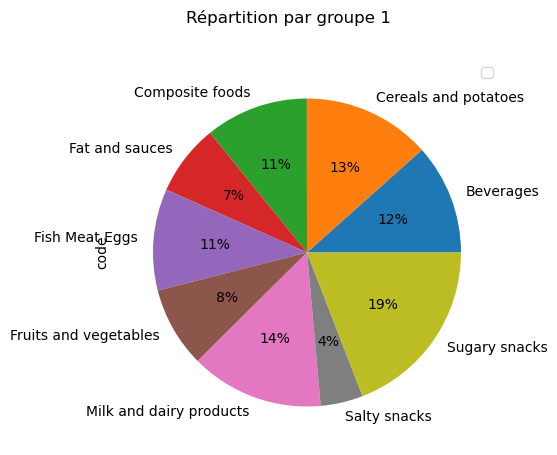

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

for i in elements : 
    Open_Food_Fact[i] = Open_Food_Fact_knn[i]
Open_Food_Fact['carbohydrates_100g'] = Open_Food_Fact_iter['carbohydrates_100g']

plt.figure(figsize=(15,7.5))
Open_Food_Fact.groupby(['pnns_groups_1']).count().iloc[:,0:1].plot(kind='pie', subplots=True, title='Répartition par groupe 1', figsize=[15,5], autopct = lambda x: str(round(x)) + '%')
plt.legend([])
plt.grid()

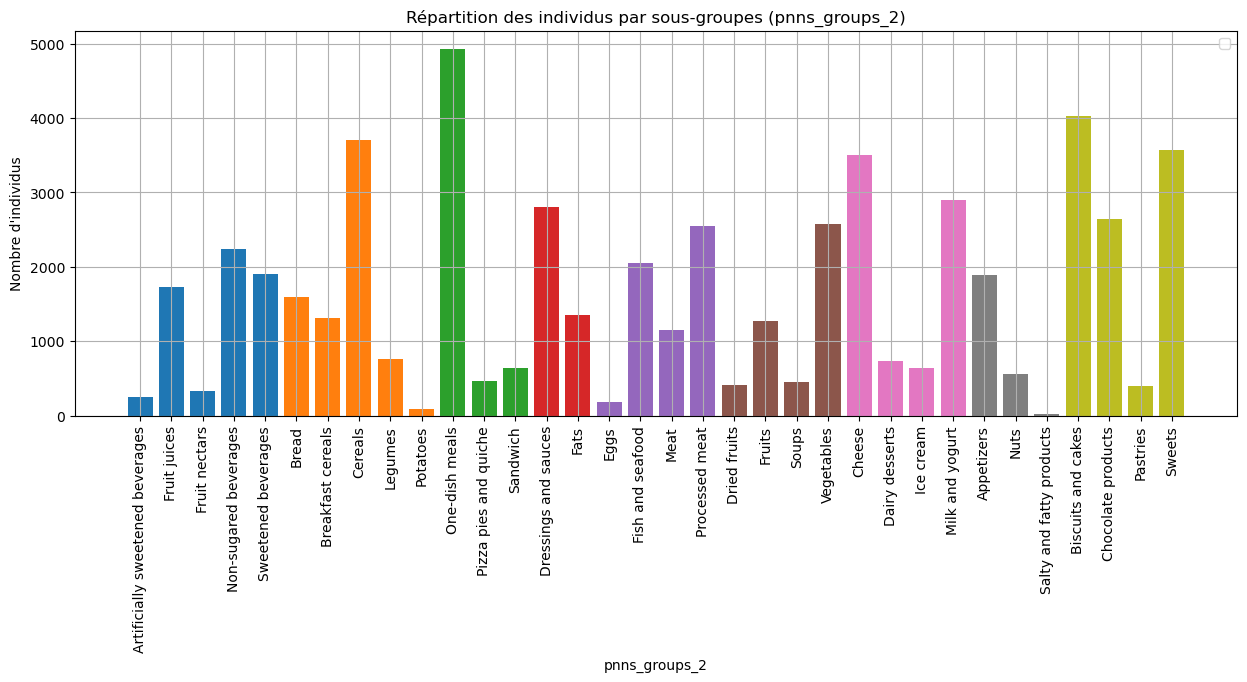

In [24]:
Open_Food_Fact_grouped = Open_Food_Fact.groupby(['pnns_groups_1', 'pnns_groups_2']).count()['code']

plt.figure(figsize=(15, 5))

for group1, group1_data in Open_Food_Fact_grouped.groupby(level=0):
    plt.bar(group1_data.index.get_level_values(1), group1_data.values, label=group1)

plt.title("Répartition des individus par sous-groupes (pnns_groups_2)")
plt.xlabel("pnns_groups_2")
plt.ylabel("Nombre d'individus")
plt.legend(title="pnns_groups_1")
plt.xticks(rotation=90)
plt.legend([])
plt.grid()
plt.show()

Ces 2 graphiques donnent lieu à 3 hypothèses, à savoir : 
- La variable "pnns_group_2" est dépendante à 100% de la variable "pnns_group_1". Il est donc possible, à termes, d'imputer automatiquement une valeur "pnns_group_1" à partir de l'entrée d'une valeur "pnns_group_2"
- Chaque groupe d'aliment présente des caractéristiques distinctives dans leurs profils au niveau des valeurs quantitatives.
- Au sein même de ces groupes se trouvent un certain nombre de caractéristiques divers dans les profils étudiés.

Nous pouvons confirmer cela à travers une série de boxplots représentant la distribution des valeurs de chaque variable en fonction de l'appartenance à "pnns_groups_1" : 

<Figure size 1500x750 with 0 Axes>

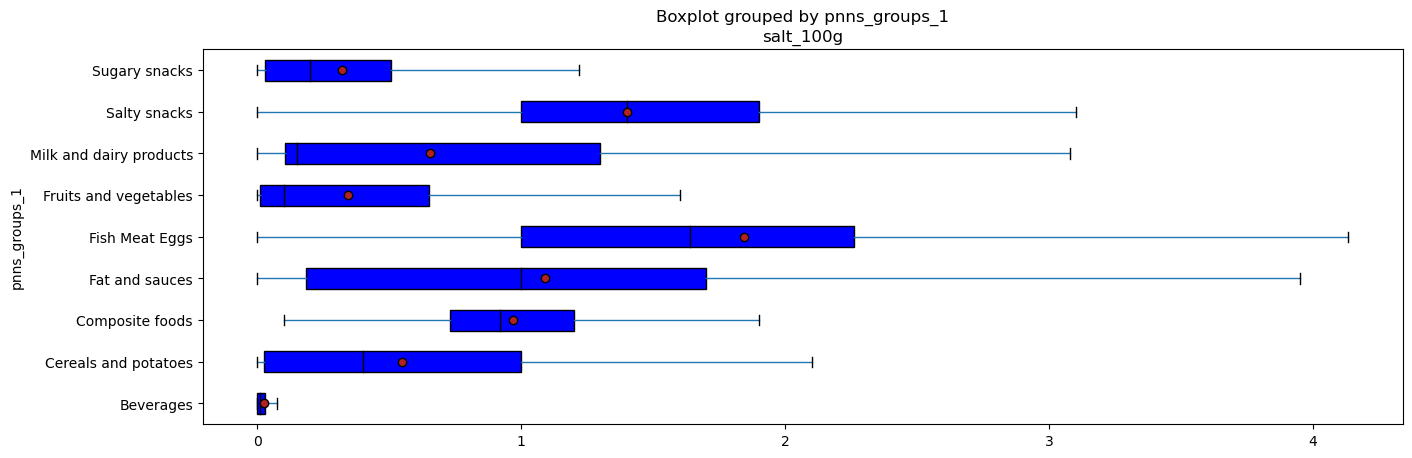

<Figure size 1500x750 with 0 Axes>

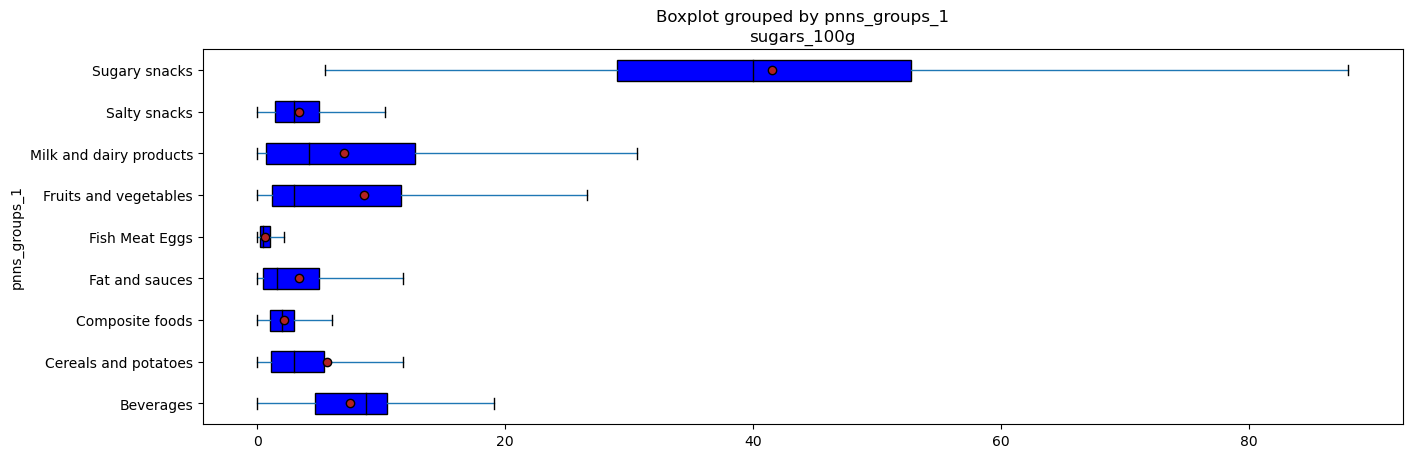

<Figure size 1500x750 with 0 Axes>

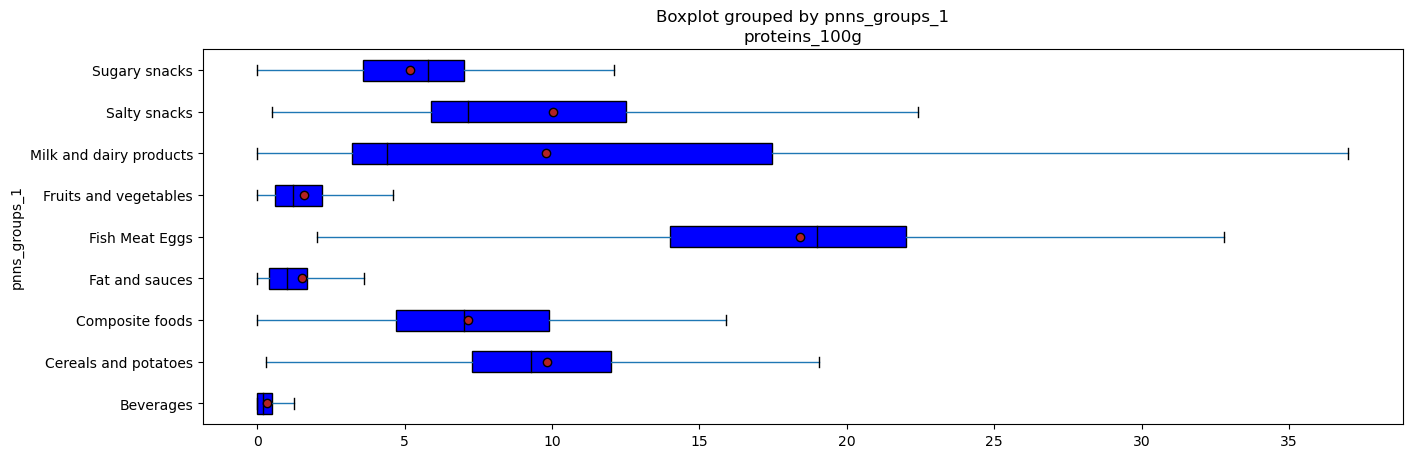

<Figure size 1500x750 with 0 Axes>

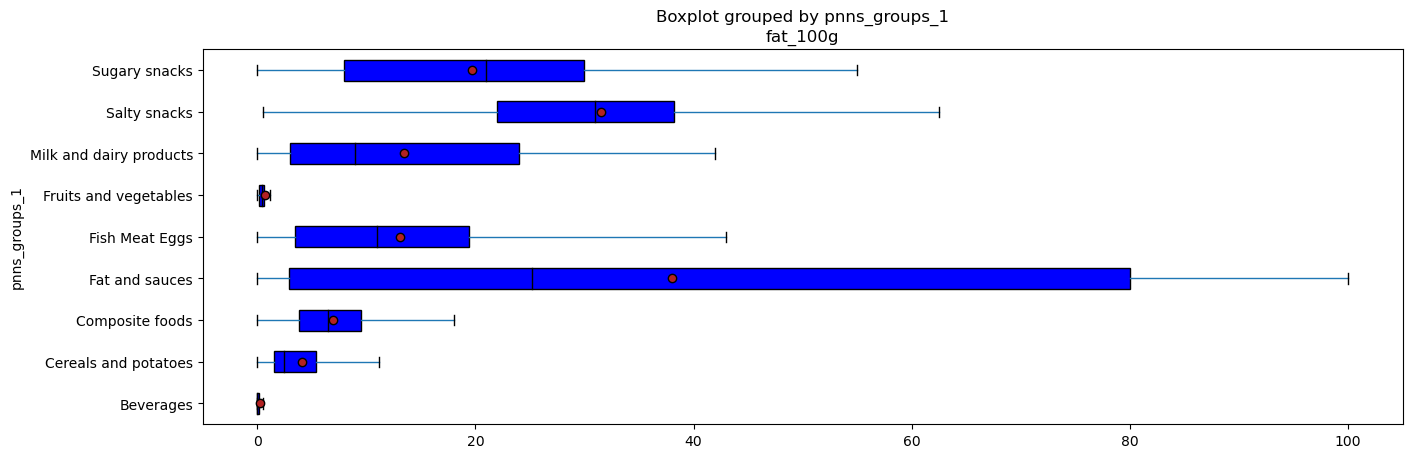

<Figure size 1500x750 with 0 Axes>

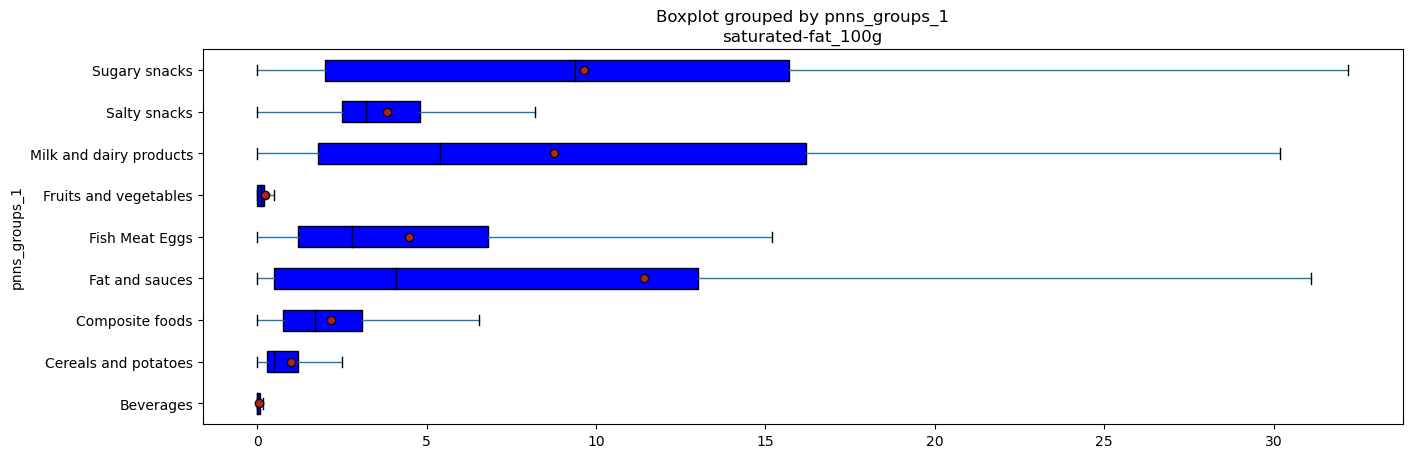

<Figure size 1500x750 with 0 Axes>

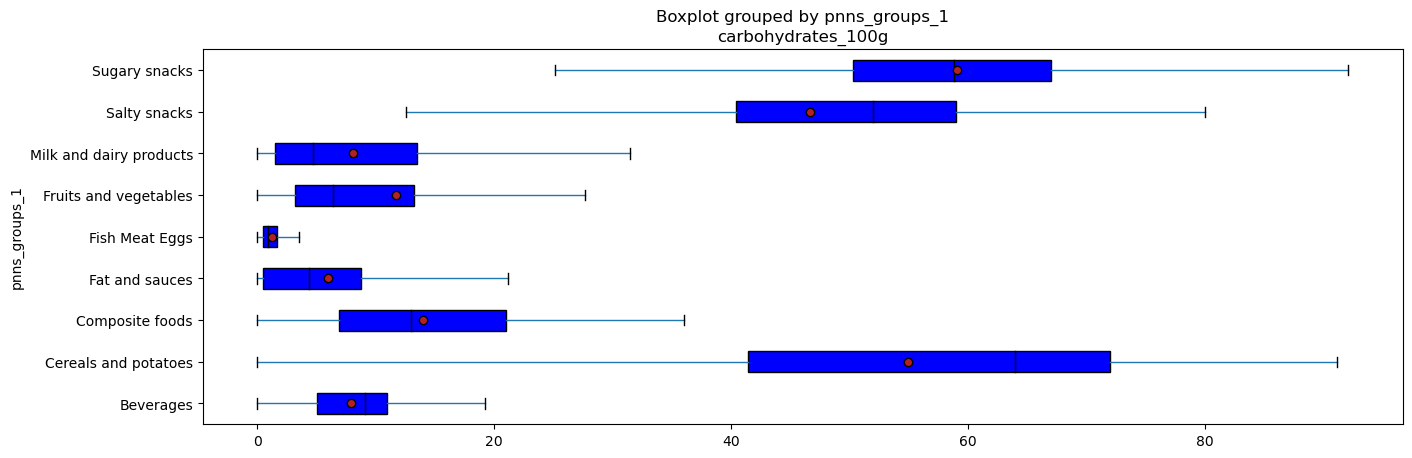

<Figure size 1500x750 with 0 Axes>

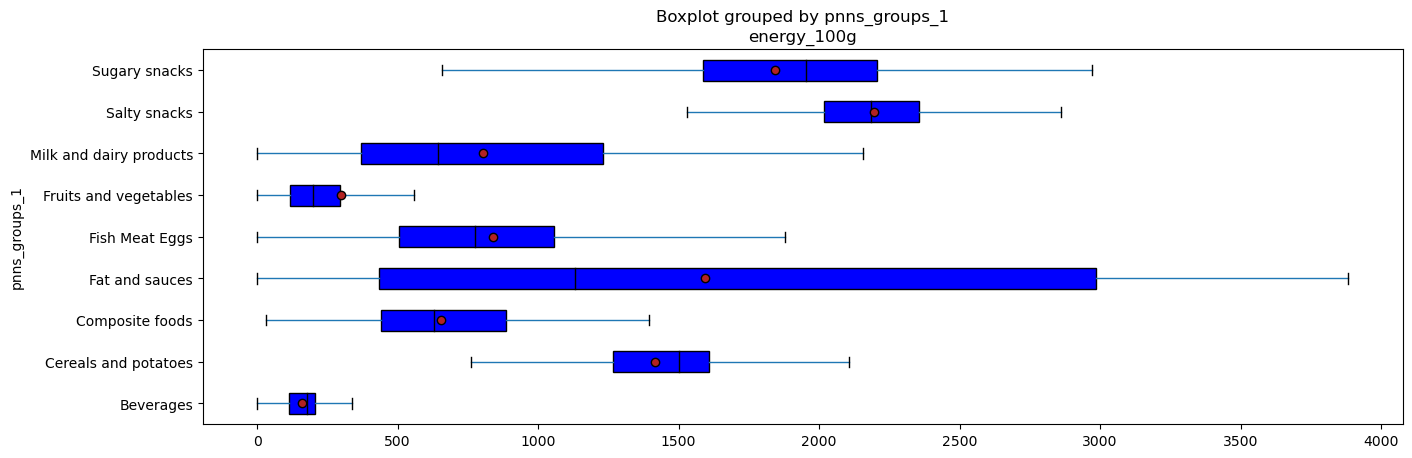

<Figure size 1500x750 with 0 Axes>

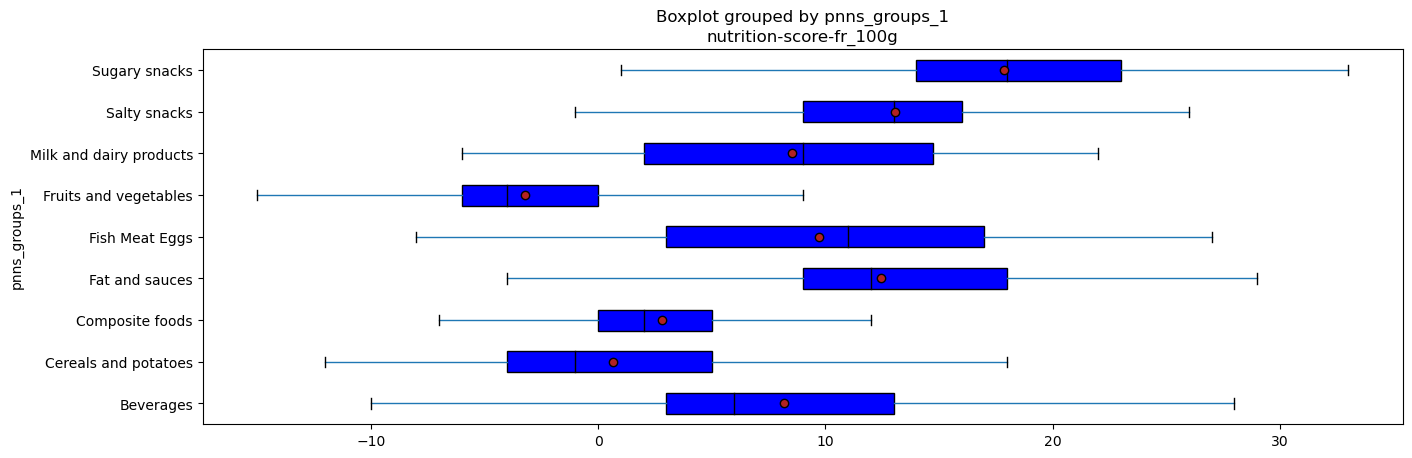

In [25]:
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black', 'markerfacecolor':'firebrick'}

for i in elements:
    plt.figure(figsize=(15, 7.5))
    Open_Food_Fact.boxplot(column=i, by='pnns_groups_1', figsize=[15,5], medianprops=medianprops, showmeans=True, 
                      meanprops=meanprops, vert=False, showfliers=False, patch_artist=True, 
                      boxprops=dict(facecolor="blue", color="black"))
    plt.grid()
    plt.show()

Comme supposé, la distribution des valeurs pour chacun de nos variables changent considérablement en fonction du groupe alimentaire étudié. A titre d'exemple, d'après nos boxplots, les chances de retrouver des valeurs similaires dans la variable "energy_100g" entre un produit appartenant au groupe "cereals and potatoes" et un autre appartenant au groupe "beverages" sont infiniment faibles.

Le groupe alimentaire auquel appartient chaque individu a donc clairement un impact sur les chiffres de ses informations nutritionnelles. Nous allons, grâce à une série d'analyses bi-variées, tenter mesurer cet impact.

## 2. Analyses Bi-Variées <a name=11 ></a>

Dans cette partie, nous allons visualiser la manière dont sont répartis nos produits selon le groupe alimentaire auquel il appartient tout en mesurant les corrélations possibles entre variables. Le pairplot qui regroupe toutes les combinaisons possibles permettant une comparaison optimale : 

C:\Users\Alex-\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Alex-\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Alex-\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Alex-\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

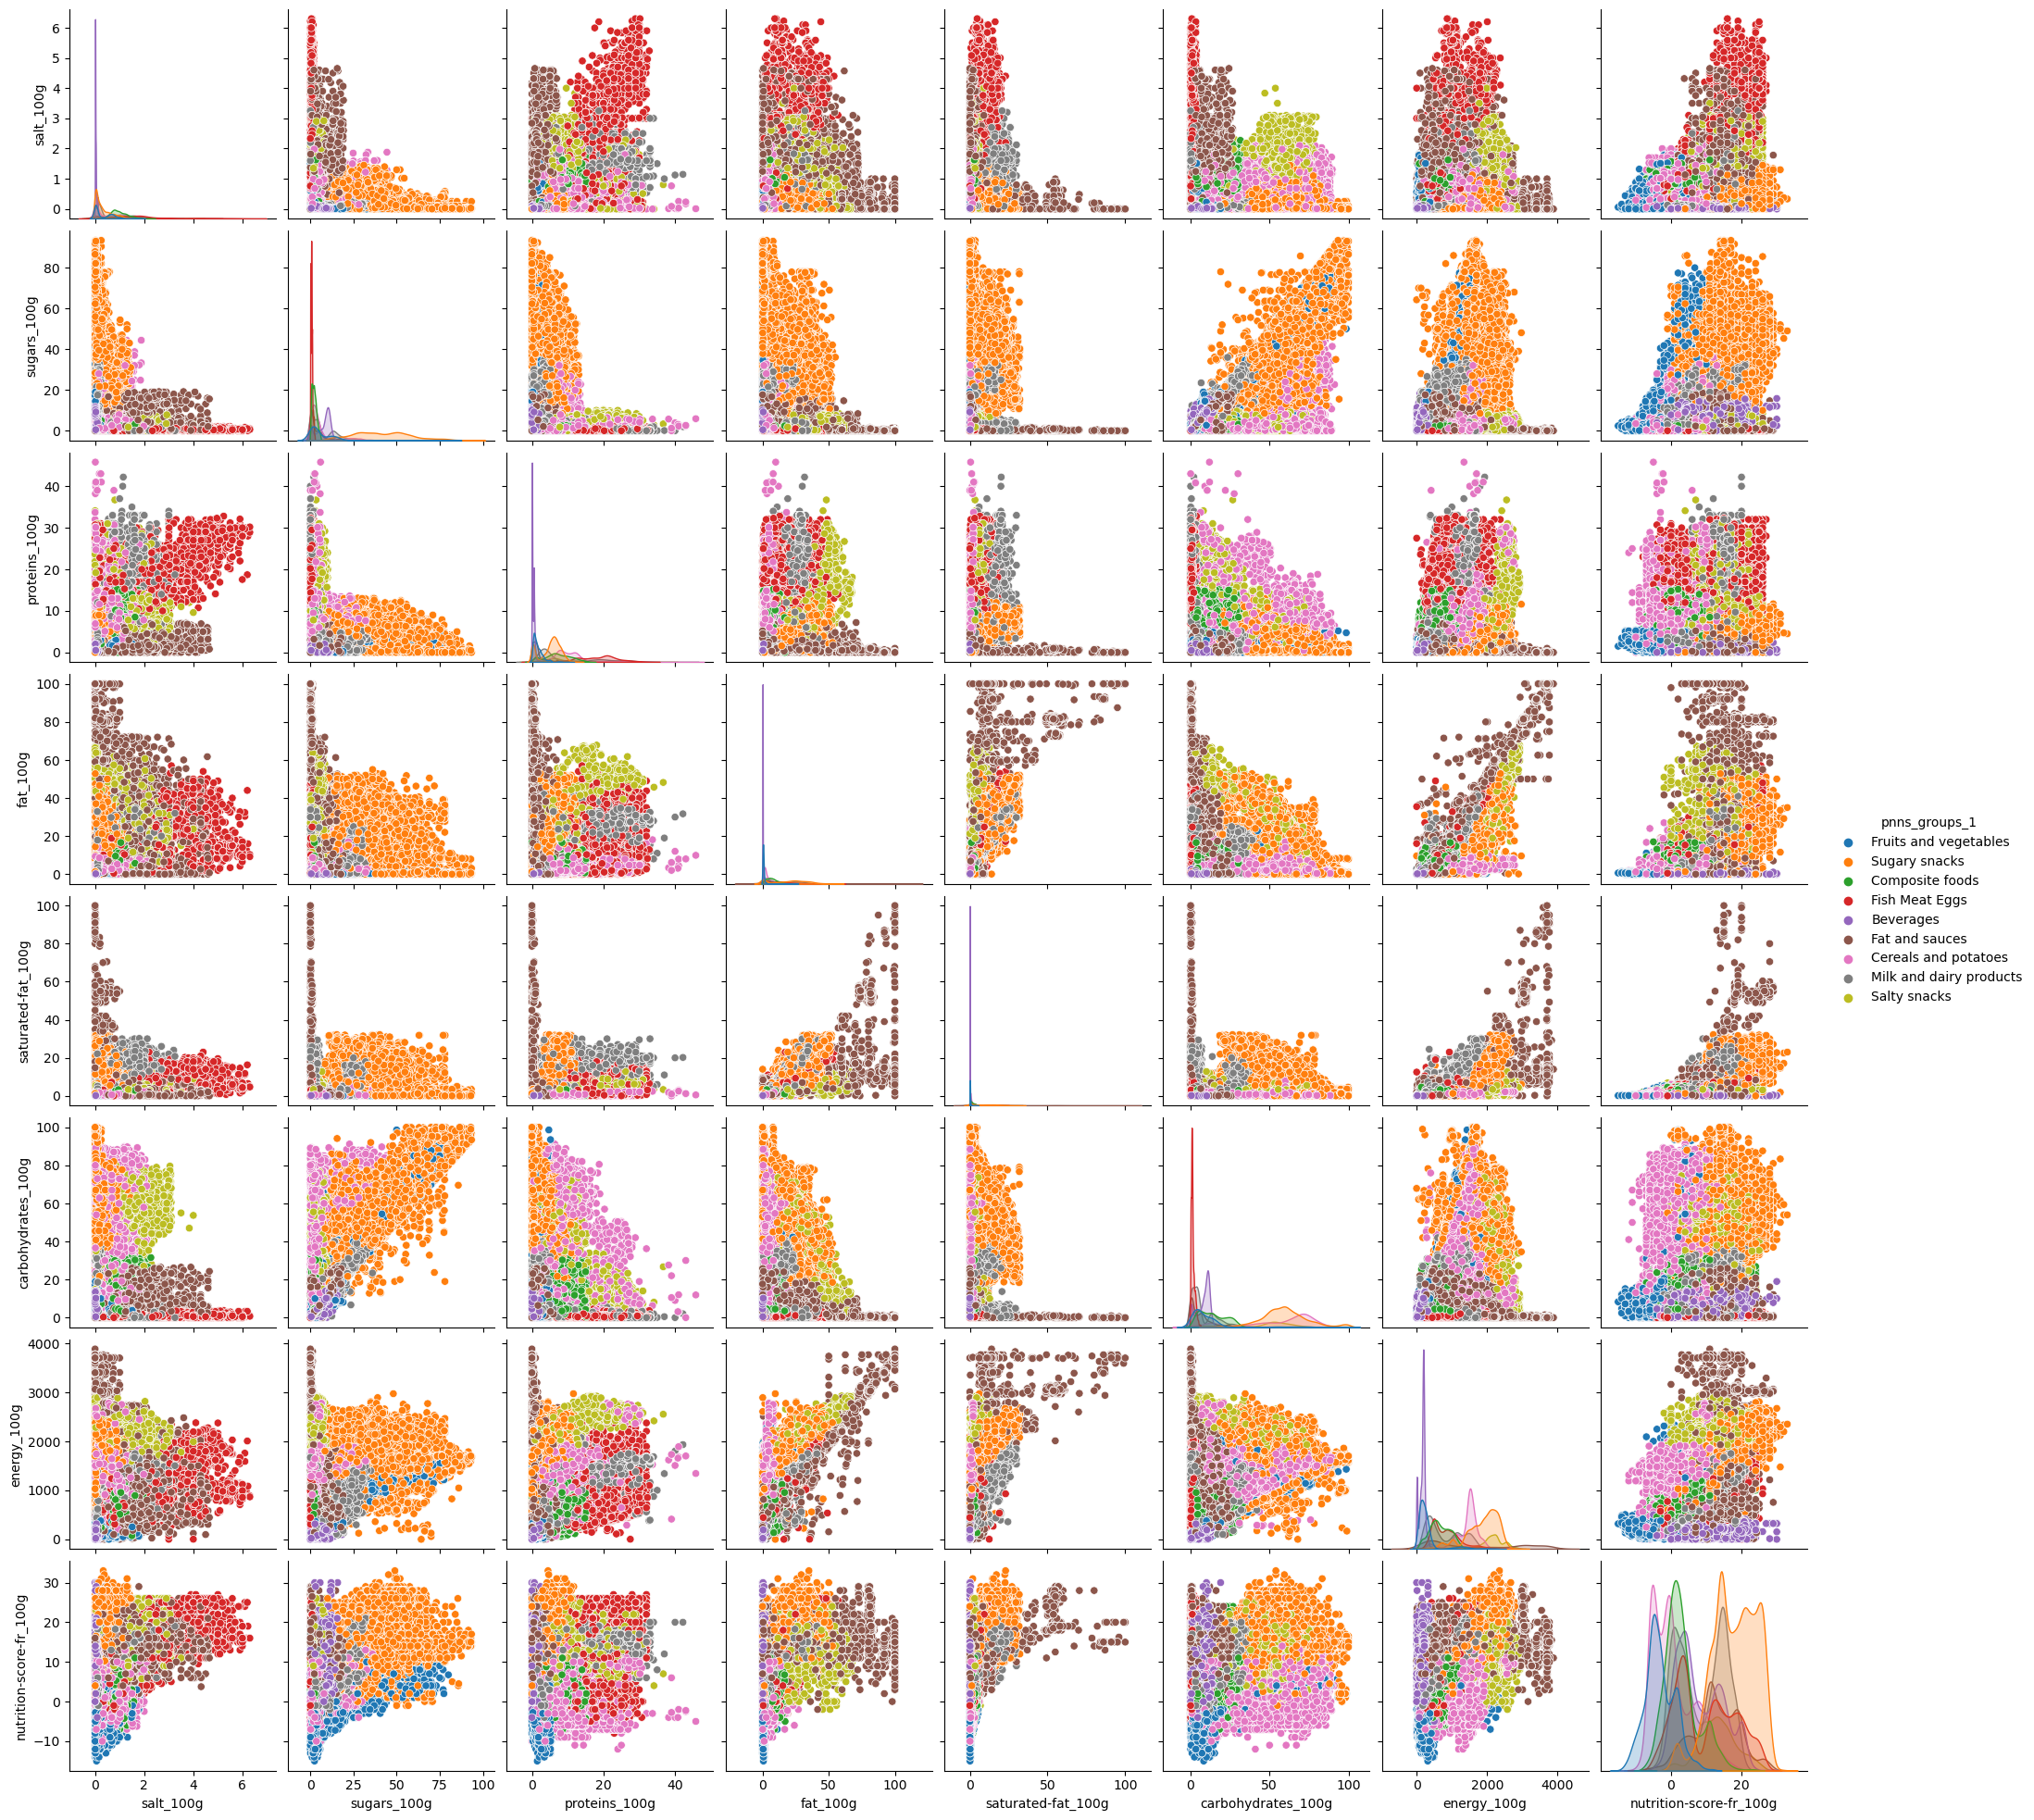

In [26]:
sns.pairplot(Open_Food_Fact.iloc[:,[1,3,4,5,6,7,8,9,10]], hue='pnns_groups_1')

Si l'on observe le pairplot dans son ensemble, nous nous aperçevons effectivement de l'existence de clusters parmi les produits, qui se déterminent bel et bien selon la catégorie alimentaire, aisi que de corrélations entre plusieurs variables, dont certaines s'expliquent par une approche métier.

Concernant lesdites corrélations entre nos variables, il est possible de les calculer et de les visualiser de manière claire grâce à l'outil heatmap de la librairie seanborn : 

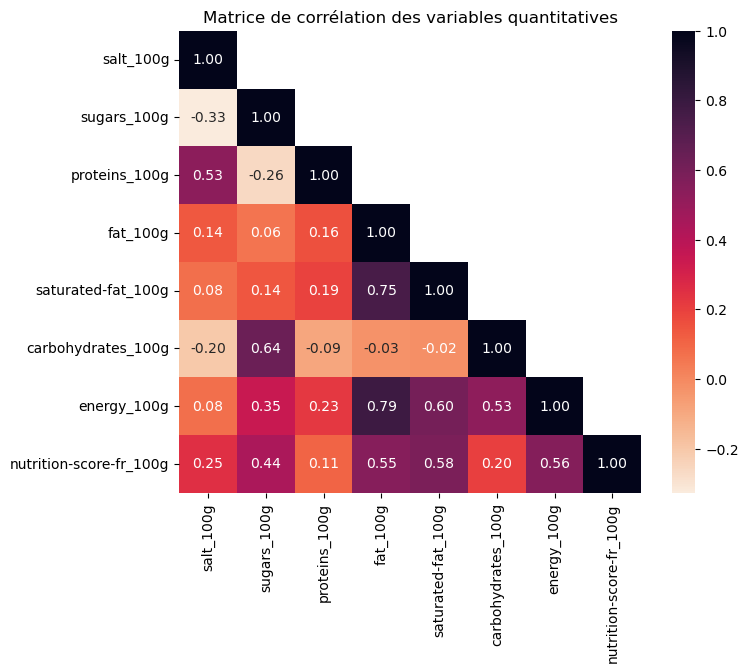

In [27]:
plt.figure(figsize=(8, 6))
cmap = sns.cm.rocket_r
mask = np.triu(np.ones_like(Open_Food_Fact[elements].corr(), dtype=bool), k=1)
sns.heatmap(Open_Food_Fact[elements].corr(), mask=mask, annot=True, cmap=cmap, fmt=".2f", square=True)
plt.title('Matrice de corrélation des variables quantitatives')
plt.show()

Nous remarquons ici que le degré de corrélation diffère amplement selon les variables en jeu. Nous allons visualiser de plus près ceux dont les degrés de corrélation sont les plus élevés, à savoir : 
- fat_100g-energy_100g
- fat_100g - saturated_fat-100g
- carbohydrates_100g - sugars_100g
- energy_100g - saturated-fat_100g

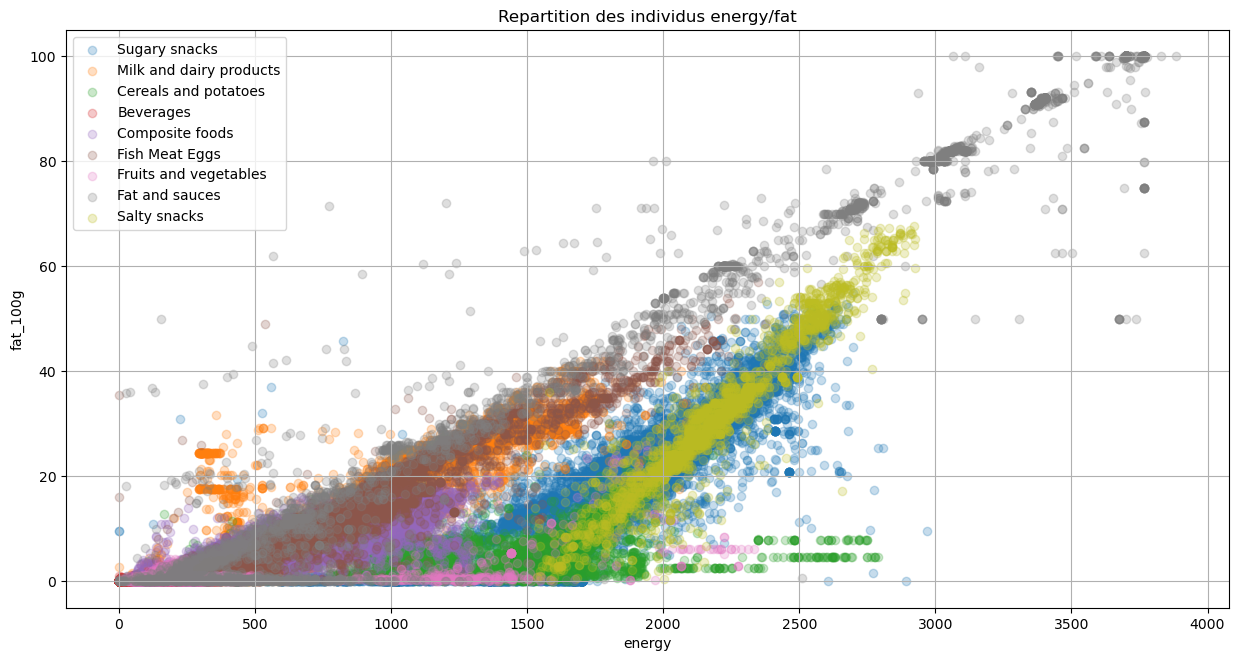

In [28]:
plt.figure(figsize=(15,7.5))
plt.xlabel('energy')
plt.ylabel('fat_100g')
plt.title("Repartition des individus energy/fat")
legend_handles = []

for i in list(Open_Food_Fact['pnns_groups_1'].value_counts().index):
    handle = plt.scatter(Open_Food_Fact['energy_100g'][Open_Food_Fact['pnns_groups_1']==i],
                Open_Food_Fact['fat_100g'][Open_Food_Fact['pnns_groups_1']==i], alpha=0.25, label = f'{i}')
    legend_handles.append(handle)
plt.legend(handles=legend_handles)
plt.grid()
plt.show()

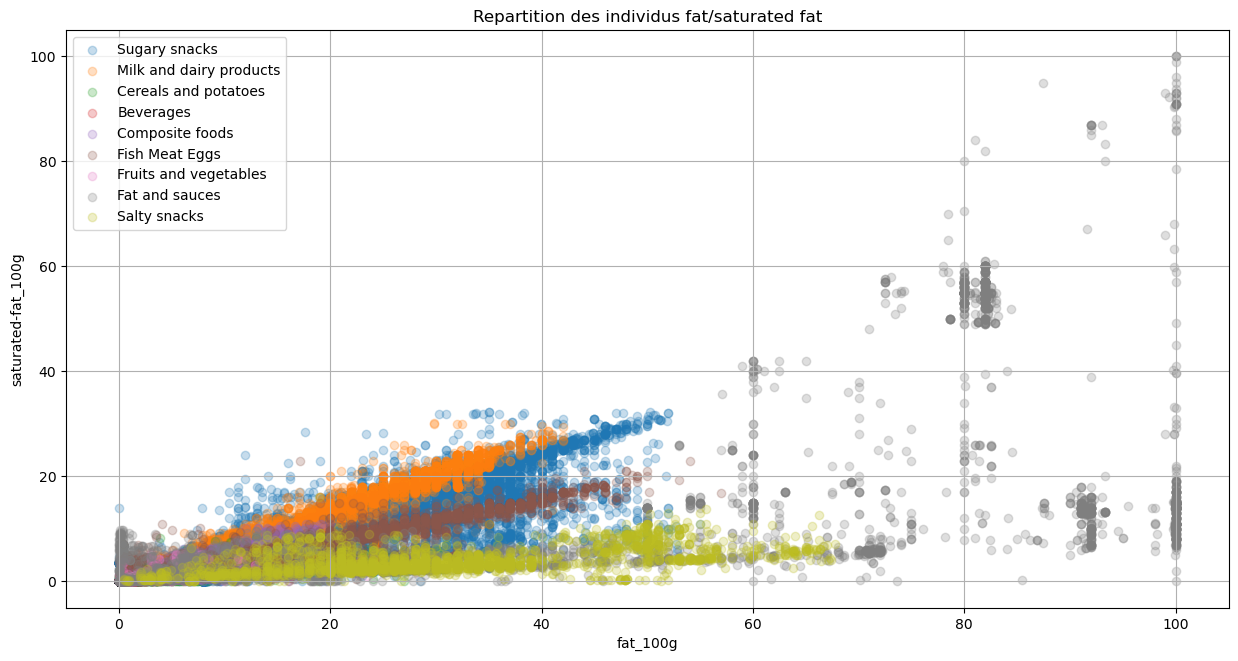

In [29]:
plt.figure(figsize=(15,7.5))
plt.xlabel('fat_100g')
plt.ylabel('saturated-fat_100g')
plt.title("Repartition des individus fat/saturated fat")
legend_handles = []

for i in list(Open_Food_Fact['pnns_groups_1'].value_counts().index):
    handle = plt.scatter(Open_Food_Fact['fat_100g'][Open_Food_Fact['pnns_groups_1']==i],
                Open_Food_Fact['saturated-fat_100g'][Open_Food_Fact['pnns_groups_1']==i], alpha=0.25, label = f'{i}')
    legend_handles.append(handle)
plt.legend(handles=legend_handles)
plt.grid()
plt.show()

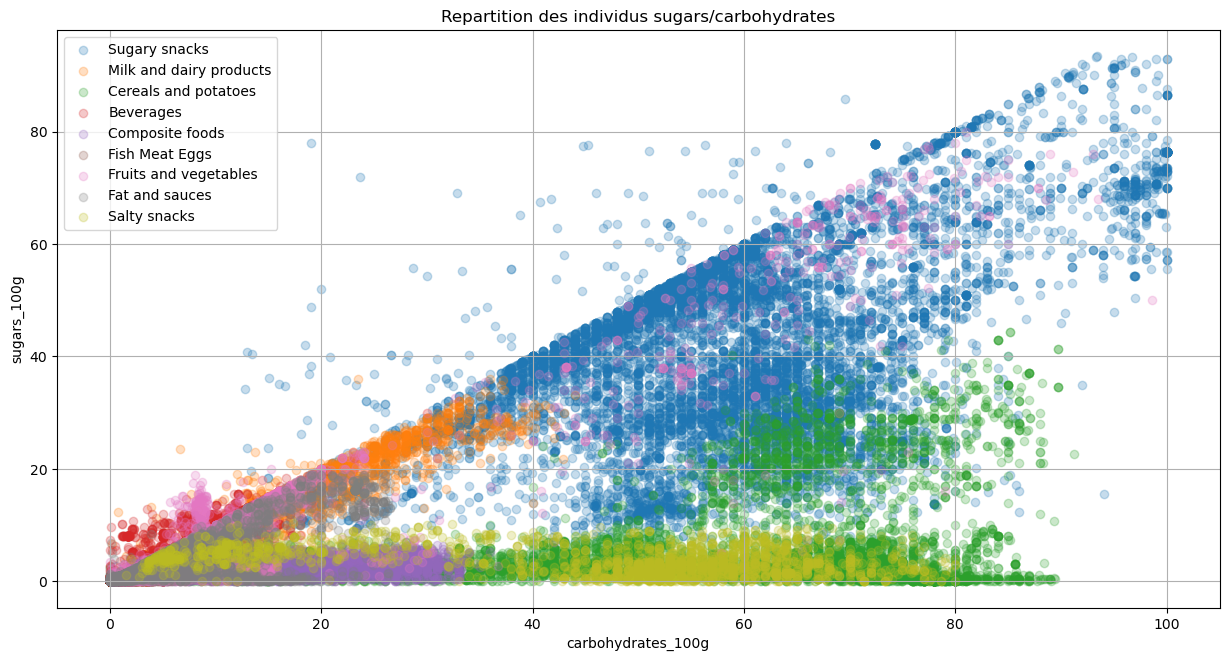

In [30]:
plt.figure(figsize=(15,7.5))
plt.xlabel('carbohydrates_100g')
plt.ylabel('sugars_100g')
plt.title("Repartition des individus sugars/carbohydrates")
legend_handles = []

for i in list(Open_Food_Fact['pnns_groups_1'].value_counts().index):
    handle = plt.scatter(Open_Food_Fact['carbohydrates_100g'][Open_Food_Fact['pnns_groups_1']==i],
                Open_Food_Fact['sugars_100g'][Open_Food_Fact['pnns_groups_1']==i], alpha=0.25, label = f'{i}')
    legend_handles.append(handle)
plt.legend(handles=legend_handles)
plt.grid()
plt.show()

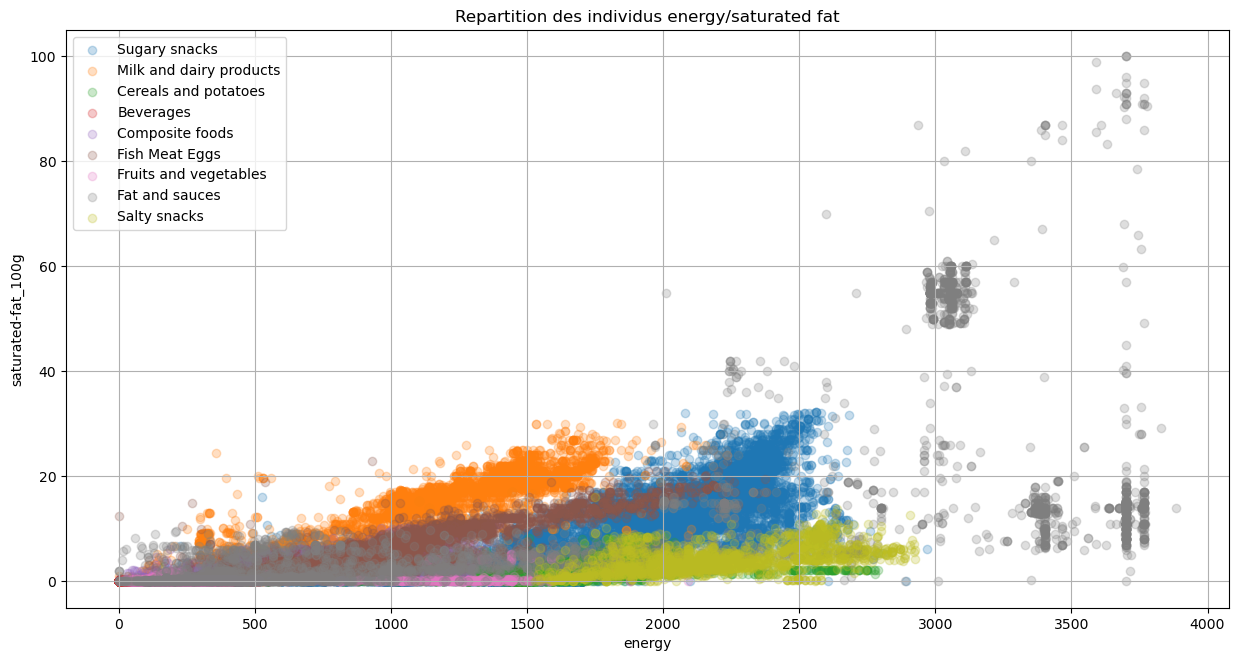

In [31]:
plt.figure(figsize=(15,7.5))
plt.xlabel('energy')
plt.ylabel('saturated-fat_100g')
plt.title("Repartition des individus energy/saturated fat")
legend_handles = []

for i in list(Open_Food_Fact['pnns_groups_1'].value_counts().index):
    handle = plt.scatter(Open_Food_Fact['energy_100g'][Open_Food_Fact['pnns_groups_1']==i],
                Open_Food_Fact['saturated-fat_100g'][Open_Food_Fact['pnns_groups_1']==i], alpha=0.25, label = f'{i}')
    legend_handles.append(handle)
plt.legend(handles=legend_handles)
plt.grid()
plt.show()

Même si elles ne sont pas parfaites, les corrélations entre nos variables sont ici nettement visibles, tout comme l'existence de clusters en fonction des groupes alimentaires "pnns_groups_1". L'hypothèse selon laquelle les valeurs de nos features pourrait permettre de déterminer la valeur cible n'est donc pas à rejeter. Nous pouvons également noter l'existence de clusters à l'intérieur même de chaque groupe "pnns_groups_1", ce qui confirme l'hypothèse selon laquelle les features pourraient également déterminer à quels sous-groupes les produits peuvent appartenir.

En revanche, ces graphiques démontrent également les limites propres à l'imputation de valeurs manquantes par la méthode itérative ou knn : sur le plan approche métier, nous avions convenu que les valeurs de "sugars_100g" seraient toujours inférieurs ou égales à celles de "carbohydrates_100g", idem pour "saturated_fat_100g" et "fat_100g". Or, l'imputation de nos valeurs manquantes ne tient pas compte de ces critères, nos graphiques démontrent ainsi clairement que certaines valeurs dépassent les seuils établis. Voilà pourquoi un deuxième nettoyage des données par approche métier est nécessaire avant de pouvoir aller plus loin.

# V. Analyse Multi-Variée <a name=12 ></a>

Les analyses qui vont suivre permettront de confirmer définitivement la faisabilité du projet. Cela s'effectuera par des études approfondies de nos features vis-à-vis de notre variable cible et qui constitueront un premier pas vers la création d'une nouvelle variable à but prédictif. Dans ce cadre, nous effectuerons tout d'abord une Analyse des Composantes Principales (ACP) ainsi qu'une Analyse de la Variance (ANOVA). Cette dernière sera effectuée seulement après avoir vérifié ses conditions de validité.

## 1. Analyse des Composantes Principales (ACP) <a name=13 ></a>

L'Analyse en Composantes Principales (ACP) permet de transformer des variables corrélées en variables décorrélées baptisée "composantes principales". Plus précisément, cette méthode vise à réduire le nombre de variables appliquées à des individus, pour simplifier les observations tout en conservant un maximum d’informations. Seules une, deux ou trois variables dites "composantes principales" sont conservées.

Pour procéder à notre analyse, nous allons tout d'abord créer un graphique représentant l'éboulis de valeurs propres. Ce graphique va nous permettre de choisir un nombre de composantes principales en fonction du pourcentage d'inerties que ces composantes sont capables d'expliquer à elles seules. En fonction de ce graphique, nous serons en mesure de connaître le nombre de champs factoriels à étudier.

Le graphique d'éboulis de valeurs propres n'est possible qu'à condition de ne garder que les 6 variables quantitatives permettant d'expliquer is_genuine ("X") et de standardiser l'ensemble des valeurs qu'elles regroupent ("X_scaled") :

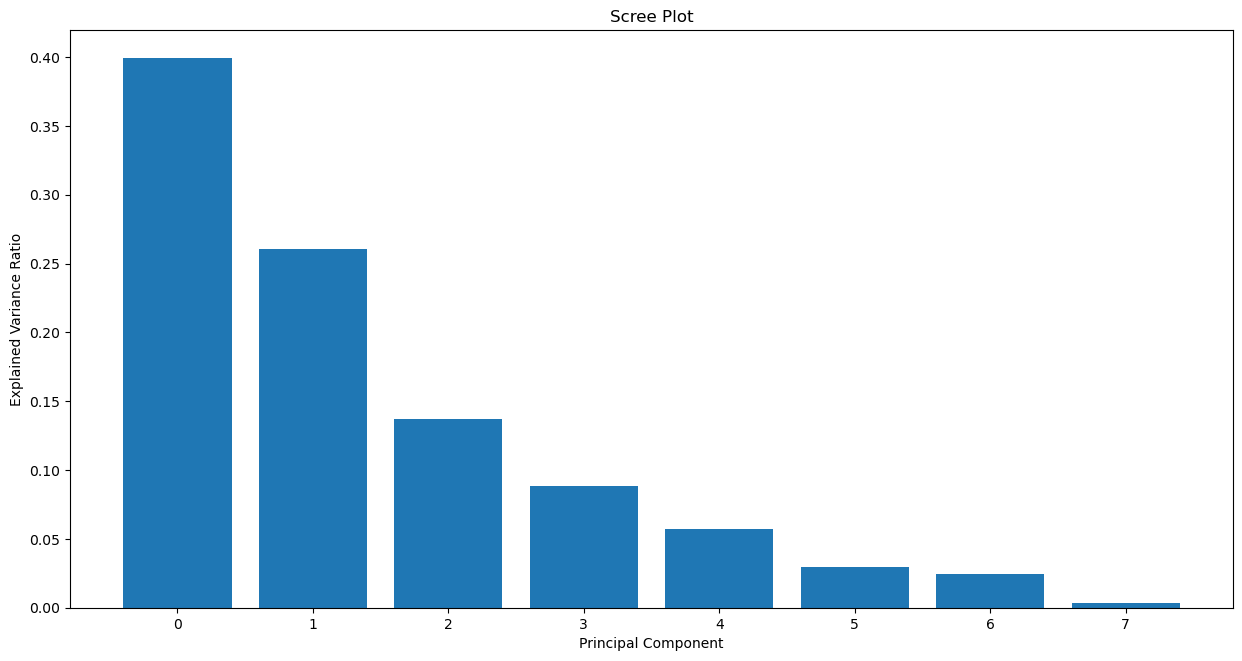

In [32]:
Open_Food_Fact['carbohydrates_100g'] = Open_Food_Fact.apply(lambda x: x['sugars_100g'] if x['sugars_100g'] > x['carbohydrates_100g'] else x['carbohydrates_100g'], axis = 1)
Open_Food_Fact['fat_100g'] = Open_Food_Fact.apply(lambda x: x['saturated-fat_100g'] if x['saturated-fat_100g'] > x['fat_100g'] else x['fat_100g'], axis = 1)

from sklearn import decomposition
from sklearn import preprocessing

def display_scree_plot(pca):
    plt.bar(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_)
    plt.xlabel('Principal Component')
    plt.ylabel('Explained Variance Ratio')
    plt.title('Scree Plot')
    plt.show()

X = Open_Food_Fact[elements]

std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

pca = decomposition.PCA(n_components=8)
pca.fit(X_scaled)

plt.figure(figsize=(15,7.5))
display_scree_plot(pca)

Ici, la première composante principale de notre base de données explique à elle seule 40% des interties. Combinée à la deuxième, nous sommes en mesure de calculer 65% des inerties, ce nous pouvons considérer comme suffisant.

Calculer notre ACP à partir de 2 composantes principales signifie que nous n'aurons besoin de calculer qu'un seul champs factoriel. Nous allons ainsi être en mesure de projeter l'ensemble de nos individus sur un graphique en 2 dimensions et ainsi avoir une idée des différences globales qui permettent la séparation des vrais billets des faux.

Pour pouvoir effectuer cette manipulation, nous allons avoir besoin de connaître le positionnement de nos 8 dimensions, et notamment les niveaux de corrélations existants :

<Figure size 1500x750 with 0 Axes>

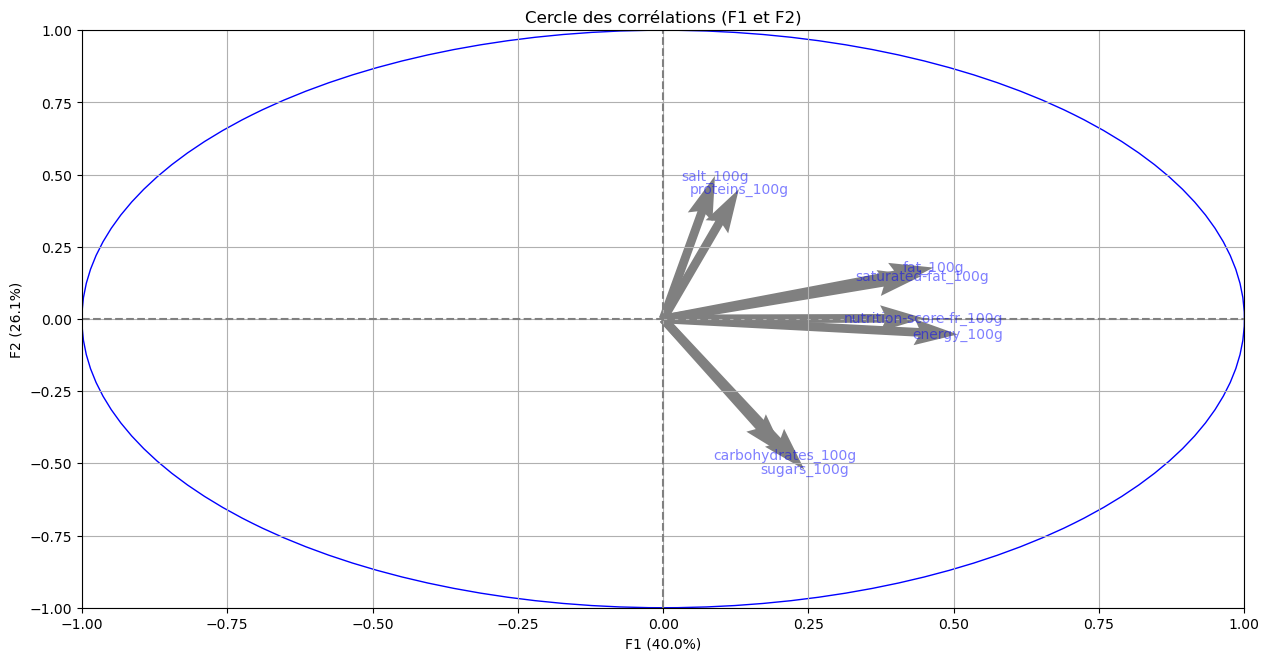

In [33]:
def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):    
    for d1, d2 in axis_ranks:
        if d2 < n_comp:
            fig, ax = plt.subplots(figsize=(15,7.5))
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))

            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='10', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)            

            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)

            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.grid()
            plt.show()

pcs = pca.components_
plt.figure(figsize=(15,7.5))
display_circles(pcs, 4, pca, [(0,1)], labels = np.array(X.columns))

A l'intérieur de notre cercle, nous pouvons observer trois tendances principales : 
- de par notre modélisation par approche métier, la corrélation entre les variables "sugar_100g" et "carbohydrates_100g" est quasi-parfaite
- il est probable que lorsque la valeur d'une de ces variables diminiue, celles des variables "salt_100g" et "proteins_100g" tendraient vers la hausse. Du point de vue métier, cela semble cohérent, dans la mesure où une séparation existe dans une grande majorité des produits alimentaires en ceux dits sucrés et ceux dits salés. De plus la teneur en protéine est essentiellement associée aux produits d'origine animale, donc pas ou peu sucrées par définition.
- enfin, les variables "fat_100g" et "saturated_fat_100g", qui sont corrélées entre elles de la même manière que "sugars_100g" et "carbohydrates_100g", montrent une corrélation importante avec les variables "energy_100g" et "nutrition-score-fr_100g". Là également, il y a cohérence dans cette tendance si l'on observe cela d'un point de vue métier.

En tenant compte de ces tendances, nous devrions retrouver, dans la projection qui va suivre, des groupements de points bien distincts confirmant une séparation entre chaque groupe alimentaire : 

<Figure size 1500x750 with 0 Axes>

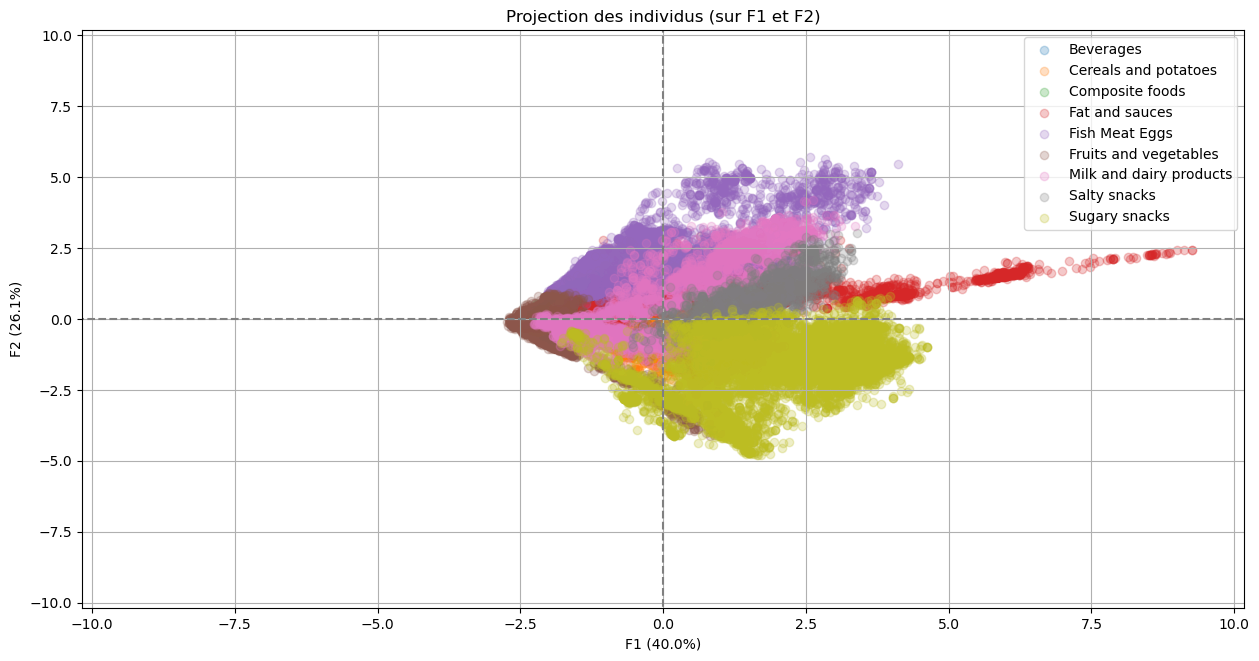

In [34]:
def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, illustrative_var=None, alpha=1):
    for d1, d2 in axis_ranks:
        if d2 < n_comp:
            fig = plt.figure(figsize=(15,7.5))
            if illustrative_var is not None:
                illustrative_var = np.array(illustrative_var)
                classes = np.unique(illustrative_var)
                for i, classe in enumerate(classes):
                    plt.scatter(X_projected[illustrative_var==classe, d1], X_projected[illustrative_var==classe, d2], alpha=alpha, label=classe)
                plt.legend()
            else:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)

            boundary = np.max(np.abs(X_projected[:, [d1, d2]])) * 1.1
            plt.xlim([-boundary, boundary])
            plt.ylim([-boundary, boundary])

            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))
            plt.title("Projection des individus (sur F{} et F{})".format(d1+1, d2+1))
            plt.grid()
            plt.show()

X_projected = pca.transform(X_scaled)
plt.figure(figsize=(15,7.5))
display_factorial_planes(X_projected, 2, pca, [(0,1)], illustrative_var=Open_Food_Fact['pnns_groups_1'], alpha=0.25)

Notre répartition par composantes principales confirme ici l'hypothèse selon laquelle chaque groupe alimentaire présente des caractéristiques distinctes. Dans ce graphique, par exemple, il n'est pas étonnant de voir des produits appartenant à la catérogie "Fats and sauces" tendre vers la droite, ceux appartenant à la catégorie "Sugary snacks" tendre vers le bas et enfin ceux appartenant à "Fish Meat Eggs", "Milk and dairy products" et "Salty Snack" tendre vers le haut.

Notre analyse des composantes principales valide donc la faisabilité de notre projet. La dernière étape avant de conclure notre étude consiste donc maintenant à effectuer une Analyse de la Variance (ANOVA)

## 2. Analyse de la Variance(ANOVA) <a name=14 ></a>

Nous allons donc étudier ici en détails les valeurs de chacun de nos 8 features en procédant à une analyse de la variance, ou ANOVA. Cette analyse consiste à détecter les corrélations qui peuvent exister entre une variable quantitative, ici nos 8 features, et une variable qualitative, ici la variable cible "pnns_groups_1", ainsi qu'à mesurer le niveau d'importance de ces corrélations.

La totalité des analyses de faites pour chacune de nos variables se fera donc en fonction de la variable "pnns_group_1". Nous saurons dès lors si certaines valeurs peuvent permettre la prédiction de la variable cible et jusqu'à quel point elles peuvent être déterminantes dans cette démarche. En faisant cela, il sera alors possible de sélectionner les variables les plus pertinentes dans la construction d'un modèle de prédiction.

Cependant, pour que les résultats de l'ANOVA soient fiables et significatifs, certaines conditions doivent être respectées. Il est donc indispensable de vérifier ces conditions dans notre jeu de données avant de pouvoir procéder à l'analyse. Voici les principales conditions de validité de l'ANOVA :

- Indépendance des observations : Les observations doivent être indépendantes les unes des autres. Cela signifie que les valeurs d'une observation ne doivent pas être influencées par les valeurs d'autres observations.
- Homoscédasticité : Les variances des populations dont sont issues les échantillons doivent être égales. Cela signifie que la dispersion des données dans chaque groupe doit être similaire.
- Normalité des résidus : Les écarts entre les valeurs observées et prédites doivent être aléatoires et ne pas présenter de schémas systématiques.

### 2.1. Test d'Homoscédasticité <a name=15 ></a>

Pour mesurer l'homoscédasticité de notre jeu de données, nous aurons recours au test de Levene. Il s'agit d'un test statistique utilisé pour évaluer si les variances des échantillons provenant de différentes populations sont égales. L'hypothèse nulle est que les variances sont égales. Ainsi, si le test de Levene aboutit à une p-value supérieure à un seuil de signification donné (nous allons dire de 5%), on ne rejette pas l'hypothèse nulle et on peut procéder à l'ANOVA en supposant l'homoscédasticité de notre jeu de données. En revanche, si la p-value est inférieure au seuil de signification, on rejette l'hypothèse nulle et on conclut que les variances des échantillons sont significativement différentes : 

In [35]:
from scipy.stats import levene

foodgroup = list(Open_Food_Fact['pnns_groups_1'].value_counts().index)

for i in elements : 
    sample = []
    for t in foodgroup:
        sample.append(Open_Food_Fact[Open_Food_Fact['pnns_groups_1'] == t][i])
    statistique, p_value = levene(*sample)
    print(i,":\nLevene =",round(statistique,2),"\np-value =",round(p_value,2),"\n")

salt_100g :
Levene = 1994.19 
p-value = 0.0 

sugars_100g :
Levene = 3086.32 
p-value = 0.0 

proteins_100g :
Levene = 1924.11 
p-value = 0.0 

fat_100g :
Levene = 7211.81 
p-value = 0.0 

saturated-fat_100g :
Levene = 2588.28 
p-value = 0.0 

carbohydrates_100g :
Levene = 1941.41 
p-value = 0.0 

energy_100g :
Levene = 3911.07 
p-value = 0.0 

nutrition-score-fr_100g :
Levene = 711.06 
p-value = 0.0 



Ici, la totalité des p-values sont égales à 0. Les variances de notre jeu de données sont donc totalement hétéroscédastiques. Nous pouvons donc d'ore et déjà affirmer que l'ANOVA qui sera faite donnera un résultat qui ne sera pas fiables à 100%. En revanche, cette hétéroscédasticité s'explique largement par le fait qu'il existe des disparités à l'intérieur même de chaque groupe alimentaire, voire même à l'intérieur de chaque sous-groupe ("pnns_groups_2"). La catégorie d'un produit peut donc influer fortement sur les chiffres de valeurs nutritionnelles mais ne peut en aucun cas expliquer à elle seule ces chiffres.

Poursuivons tout de même avec la vérification de notre dernière condition de validité : la normalité des résidus.

### 2.2. Test de Normalité des Résidus <a name=16 ></a>

Ici, nous aurons recours au test de Shapiro-Wilk. Il s'agit d'un test statistique utilisé pour évaluer si un échantillon de données suit une distribution normale ou gaussienne. L'hypothèse nulle est que les données sont normalement distribuées. Si la p-value associée au test est supérieure à notre seuil de signification de 5% mentionné précédemment, on ne rejette pas l'hypothèse nulle et on conclut que les données peuvent être considérées comme provenant d'une distribution normale. Si la p-value est inférieure au seuil de signification, on rejette l'hypothèse nulle et on conclut que les données ne suivent pas une distribution normale : 

In [36]:
from statsmodels.formula.api import ols
from scipy.stats import shapiro

Open_Food_Fact = Open_Food_Fact.rename(columns = {'saturated-fat_100g': 'saturated_fat_100g','nutrition-score-fr_100g':'nutrition_score_fr_100g'})
elements = [col for col in Open_Food_Fact.columns if Open_Food_Fact[col].dtype != object]

for i in elements : 
    model = ols(f'{i} ~ pnns_groups_1', data=Open_Food_Fact).fit()
    statistique, p_value = shapiro(model.resid)
    print(i,":\nShapiro =",round(statistique,2),"\np-value =",round(p_value,2),"\n")

C:\Users\Alex-\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


salt_100g :
Shapiro = 0.9 
p-value = 0.0 



C:\Users\Alex-\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


sugars_100g :
Shapiro = 0.85 
p-value = 0.0 



C:\Users\Alex-\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


proteins_100g :
Shapiro = 0.91 
p-value = 0.0 



C:\Users\Alex-\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


fat_100g :
Shapiro = 0.89 
p-value = 0.0 



C:\Users\Alex-\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


saturated_fat_100g :
Shapiro = 0.76 
p-value = 0.0 



C:\Users\Alex-\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


carbohydrates_100g :
Shapiro = 0.92 
p-value = 0.0 



C:\Users\Alex-\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


energy_100g :
Shapiro = 0.94 
p-value = 0.0 

nutrition_score_fr_100g :
Shapiro = 0.99 
p-value = 0.0 



C:\Users\Alex-\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


A nouveau, la totalité des p-values sont égales à 0. Les données ne suivent pas une distribution normale, et l'explication demeure identique à celle du test de Levene. Nous pouvons donc conclure qu'un test ANOVA donnera ici un résultat peu fiable et avec lequel nous ne serons pas en mesure de confirmer la faisabilité de notre projet à 100%.

En effet, bien que l'ANOVA puisse être un outil utile pour comparer les moyennes de plusieurs groupes, des résultats peu fiables ou non fiables peuvent indiquer des limitations dans l'interprétation des résultats de l'analyse statistique. Cependant, cela ne signifie pas nécessairement que les prédictions basées sur les données seront toujours incorrectes.

En outre, l'ANOVA constitue un test paramétrique, ce qui signifie dans notre cas de figure que les résultats de notre analyse multivariée sera plus fiable par le biais d'un test non-paramétrique. C'est pour cela qu'à la place d'une ANOVA, nous allons appliquer le test de Kruskal-Wallis.

Le test de Kruskal-Wallis est donc un test non-paramétrique utilisé pour déterminer s'il existe des différences significatives entre les médianes de trois groupes ou plus. Il est utilisé comme alternative au test d'ANOVA (Analyse de la variance) lorsque les données ne répondent pas aux conditions d'application de l'ANOVA, notamment lorsque les données ne sont pas distribuées normalement ou lorsque l'égalité des variances n'est pas satisfaite : 

In [50]:
from scipy.stats import kruskal

for i in elements : 
    sample = []
    for t in foodgroup:
        sample.append(Open_Food_Fact[Open_Food_Fact['pnns_groups_1'] == t][i])
    statistique, p_value = kruskal(*sample)
    print(i,":\nKruskal-Wallis =",round(statistique,2),"\np-value =",round(p_value,2),"\n")

salt_100g :
Kruskal-Wallis = 24093.97 
p-value = 0.0 

sugars_100g :
Kruskal-Wallis = 31473.23 
p-value = 0.0 

proteins_100g :
Kruskal-Wallis = 35675.35 
p-value = 0.0 

fat_100g :
Kruskal-Wallis = 28174.03 
p-value = 0.0 

saturated_fat_100g :
Kruskal-Wallis = 27351.15 
p-value = 0.0 

carbohydrates_100g :
Kruskal-Wallis = 39670.48 
p-value = 0.0 

energy_100g :
Kruskal-Wallis = 37483.57 
p-value = 0.0 

nutrition_score_fr_100g :
Kruskal-Wallis = 28848.93 
p-value = 0.0 



Les résultats du test de Kruskal-Wallis fournis ici indiquent une statistique de test élevée et une p-value très faible pour chaque variable quantitative. Toutes les p-values étant égales à 0, cela signifie qu'il y a des preuves statistiquement significatives pour rejeter l'hypothèse nulle selon laquelle il n'y a pas de différence significative entre les groupes. En d'autres termes, il existe des différences significatives entre les groupes pour chaque variable quantitative testée.

Les différentes catégories de la variable "pnns_groups_1" ont donc une influence significative sur les valeurs des variables quantitatives.


# Conclusion <a name=17 ></a>

L'étude qui vient d'être élaborée ici démontre que le projet de création d'un système de suggestion ou d'auto-complétion pour aider les usagers à remplir plus efficacement la base de données n'est pas inenvisageable, loin de là. Cependant, l'efficacité et la fiabilité de ce système de suggestion et d'auto-complétion dépend très largement d'un ensemble de conditions sine qua non.

- Il faut s'assurer qu'un nombre suffisant de valeurs quantitatives soient disponibles, c'est-à-dire que le nombre de features n'ayant pas de valeur rentrées pour un produit donné ne soit pas significativement élevé.
- Il faut que les features choisis pour permettre la mise en place du projet soient eux-mêmes suffisamment remplis (taux de remplissage > 50% minimum)
- Il faut que les valeurs disponibles soient en phase avec les critères métier et les critères mathématiques (par exemple, les chiffres des valeurs nutritionnelles calculées sur 100g ne doivent pas dépasser 100)
- Enfin, la présence de valeurs aberrantes doit être pris en compte dans les futurs calculs

En d'autres termes, c'est l'application de toutes les étapes de nettoyage effectuées dans cette étude qui peuvent permettre d'augmenter l'efficacité et la fiabilité du projet, et ce malgré des conditions de validité pour effectuer une ANOVA qui ne sont pas respectées.

Pour comforter cette conclusion, nous décidons de vous montrer une première démarche de création d'un modèle prédictif sur notre variable cible. Nous allons tenter de modéliser une variable prédictive via la méthode knn_classifier et nous mesurerons la fiabilité de ses résultats. Ici, nous appliquons ce modèle sur notre support de travail Open_Food_Fact, sur lequel nous au préalable effectué un long travail de nettoyage : 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import KNNImputer
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

Open_Food_Fact = Open_Food_Fact.rename(columns = {'saturated_fat_100g': 'saturated-fat_100g','nutrition_score_fr_100g':'nutrition-score-fr_100g'})
elements = [col for col in Open_Food_Fact.columns if Open_Food_Fact[col].dtype != object]

xtrain, xtest, ytrain, ytest = train_test_split(Open_Food_Fact[elements], Open_Food_Fact['pnns_groups_1'], train_size=0.8, random_state=0, stratify=Open_Food_Fact['pnns_groups_1'])

label_encoder = LabelEncoder()

def imputation(xtrain, ytrain, xtest, ytest):

    ytrain_encoded = label_encoder.fit_transform(ytrain)

    std_scale = StandardScaler().fit(xtrain)
    xtrain_scaled = std_scale.transform(xtrain)
    xtest_scaled = std_scale.transform(xtest)

    imputer = KNNImputer(n_neighbors=5)
    xtrain_imputed = imputer.fit_transform(xtrain_scaled)
    xtest_imputed = imputer.transform(xtest_scaled)

    knn_classifier = KNeighborsClassifier(n_neighbors=5)
    knn_classifier.fit(xtrain_imputed, ytrain_encoded)

    predict_encoded = knn_classifier.predict(xtest_imputed)
    predict = label_encoder.inverse_transform(predict_encoded)
    return predict

accuracy = accuracy_score(ytest,imputation(xtrain, ytrain, xtest, ytest))*100
print("Avec les features remplis à 100%, l'imputation des valeurs manquantes de la variable cible est fiable à", 
                 round(accuracy, 2), "%\n\n",classification_report(ytest,imputation(xtrain, ytrain, xtest, ytest)))

Nous pouvons constater ici que la marge d'erreur de notre variable prédictive est très légèrement inférieure à 5%, ce qui constitue un résultat concluant pour la mise en place de notre projet. Mais une fois encore, cet indice de fiabilité a été possible grâce aux opération de nettoyage et de remise aux normes des features sélectionnés, features qui eux-même étaient remplis initialement à plus de 50%.

Nous allons maintenant comparer ces chiffres en appliquant notre modèle de prédiction sur un nouveau dataset. Ce dernier provient également du document initial et regroupe l'ensemble des produits qui ont la totalité des features sélectionnés remplis. Ce dataset regroupe des produits dont la variable cible est définie ou non, et il s'agit de données brutes et non traitées : 

In [ ]:
filtered = OpenFoodFact[OpenFoodFact["salt_100g"].notna()
                            & OpenFoodFact["sugars_100g"].notna()
                            & OpenFoodFact["proteins_100g"].notna()
                            & OpenFoodFact["fat_100g"].notna()
                            & OpenFoodFact["saturated-fat_100g"].notna()
                            & OpenFoodFact["carbohydrates_100g"].notna()
                            & OpenFoodFact["energy_100g"].notna()
                            & OpenFoodFact["nutrition-score-fr_100g"].notna()]

filtered['predict'] = imputation(Open_Food_Fact[elements], Open_Food_Fact['pnns_groups_1'], filtered[elements], filtered['pnns_groups_1'])

accuracy = accuracy_score(filtered[filtered['pnns_groups_1'].notna()]['pnns_groups_1'],
                          filtered[filtered['pnns_groups_1'].notna()]['predict'])*100
classification = classification_report(filtered[filtered['pnns_groups_1'].notna()]['pnns_groups_1'],
                          filtered[filtered['pnns_groups_1'].notna()]['predict'])

print("Avec les features remplis à 100%, l'imputation des valeurs manquantes de la variable cible est fiable à", 
                 round(accuracy, 2), "%\n\n",classification)

Ici, sans respecter nos conditions de validité, la fiabilité de notre modèle de prédiction est passé à 87.5%. Cela reste correcte, cependant la marge d'erreur se retrouve nettement augmenté. Cela confirme la nécessité de préparer le jeu de données Open Food Fact au préalable avant d'envisager la mise en place de l'application.